In [2]:
from magent2.environments import battle_v4

In [49]:
config = {"map_size": 45,
            "minimap_mode": False,
            "render_mode": "human",
            "max_cycles": 100,
            "step_reward": 10}
env = battle_v4.env(**config)
env.reset()

print(f"observation space: {env.observation_space('red_0')}")
print(f"action space: {env.action_space('red_0')}")
print(f"state space: {env.state_space}")
print(f"possible agents: {env.possible_agents}")
print(f"current agent: {env.agent_selection}")
action = env.action_space("red_0").sample()
print(f"take action: {action}")
env.step(action)
print(f"current agent: {env.agent_selection}")


observation space: Box(0.0, 2.0, (13, 13, 5), float32)
action space: Discrete(21)
state space: Box(0.0, 2.0, (45, 45, 5), float32)
possible agents: ['red_0', 'red_1', 'red_2', 'red_3', 'red_4', 'red_5', 'red_6', 'red_7', 'red_8', 'red_9', 'red_10', 'red_11', 'red_12', 'red_13', 'red_14', 'red_15', 'red_16', 'red_17', 'red_18', 'red_19', 'red_20', 'red_21', 'red_22', 'red_23', 'red_24', 'red_25', 'red_26', 'red_27', 'red_28', 'red_29', 'red_30', 'red_31', 'red_32', 'red_33', 'red_34', 'red_35', 'red_36', 'red_37', 'red_38', 'red_39', 'red_40', 'red_41', 'red_42', 'red_43', 'red_44', 'red_45', 'red_46', 'red_47', 'red_48', 'red_49', 'red_50', 'red_51', 'red_52', 'red_53', 'red_54', 'red_55', 'red_56', 'red_57', 'red_58', 'red_59', 'red_60', 'red_61', 'red_62', 'red_63', 'red_64', 'red_65', 'red_66', 'red_67', 'red_68', 'red_69', 'red_70', 'red_71', 'red_72', 'red_73', 'red_74', 'red_75', 'red_76', 'red_77', 'red_78', 'red_79', 'red_80', 'blue_0', 'blue_1', 'blue_2', 'blue_3', 'blue_4', '

In [9]:
type(env.observe("red_0"))

numpy.ndarray

In [31]:
len(env.possible_agents)

162

In [46]:
red_0_obs = env.observe("red_0")

In [67]:
env.reset()
env.close()

In [56]:
import time
import numpy as np
env.reset()
for agent in env.agent_iter():
    # time.sleep(1/162)
    observation, r1, termination, truncation, info = env.last()
    if not termination and not truncation:
        print("current agent: ", env.agent_selection)
        print("reward_before ", r1)
        env.step(1)
        _, r2, _, _, _ = env.last()
        print("current agent: ", env.agent_selection)
        print("reward_after_step ", r2)
    else:
        action = None
        env.step(action)
    
env.close()

current agent:  red_0
reward_before  0
current agent:  red_1
reward_after_step  0
current agent:  red_1
reward_before  0
current agent:  red_2
reward_after_step  0
current agent:  red_2
reward_before  0
current agent:  red_3
reward_after_step  0
current agent:  red_3
reward_before  0
current agent:  red_4
reward_after_step  0
current agent:  red_4
reward_before  0
current agent:  red_5
reward_after_step  0
current agent:  red_5
reward_before  0
current agent:  red_6
reward_after_step  0
current agent:  red_6
reward_before  0
current agent:  red_7
reward_after_step  0
current agent:  red_7
reward_before  0
current agent:  red_8
reward_after_step  0
current agent:  red_8
reward_before  0
current agent:  red_9
reward_after_step  0
current agent:  red_9
reward_before  0
current agent:  red_10
reward_after_step  0
current agent:  red_10
reward_before  0
current agent:  red_11
reward_after_step  0
current agent:  red_11
reward_before  0
current agent:  red_12
reward_after_step  0
current age

In [53]:
env.reset()

_, r1, _, _, _ = env.last()
print("current agent: ", env.agent_selection)
print("reward ", r1)
env.step(1)
_, r2, _, _, _ = env.last()
print("current agent: ", env.agent_selection)
print("reward ", r2)


current agent:  red_0
reward  0
current agent:  red_1
reward  0


In [44]:
for id in range(81):
    try:
        env.observe(f"red_{id}").shape
    except:
        print(id)

28
36
37
38
39
40
41
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80


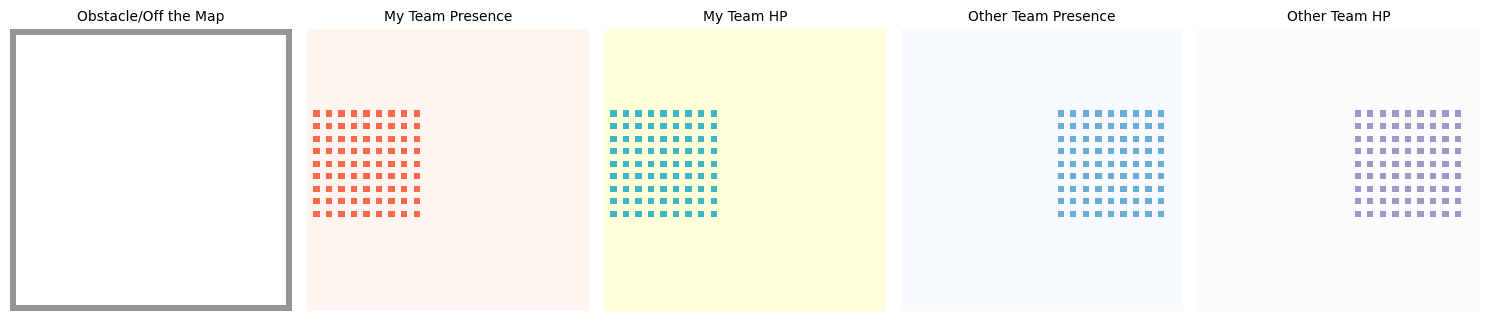

In [4]:
import numpy as np
import matplotlib.pyplot as plt

channel_to_cmap = {
    "Obstacle/Off the Map": "Grays",  # Example: Red for obstacles
    "My Team Presence": "Reds",   # Example: Green for my team
    "My Team HP": "YlGnBu",         # Example: Yellow-blue gradient for HP
    "Other Team Presence": "Blues", # Example: Blue for other team
    "Other Team HP": "Purples"      # Example: Purple for other team's HP
}

# Define the channel names
channel_names = [
    "Obstacle/Off the Map",
    "My Team Presence",
    "My Team HP",
    "Other Team Presence",
    "Other Team HP"
]

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, channel in enumerate(channel_names):
    ax = axes[i]
    ax.imshow(np.transpose(env.state()[:, :, i]), cmap=channel_to_cmap[channel], vmin=0, vmax=2)
    ax.set_title(channel_names[i], fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()

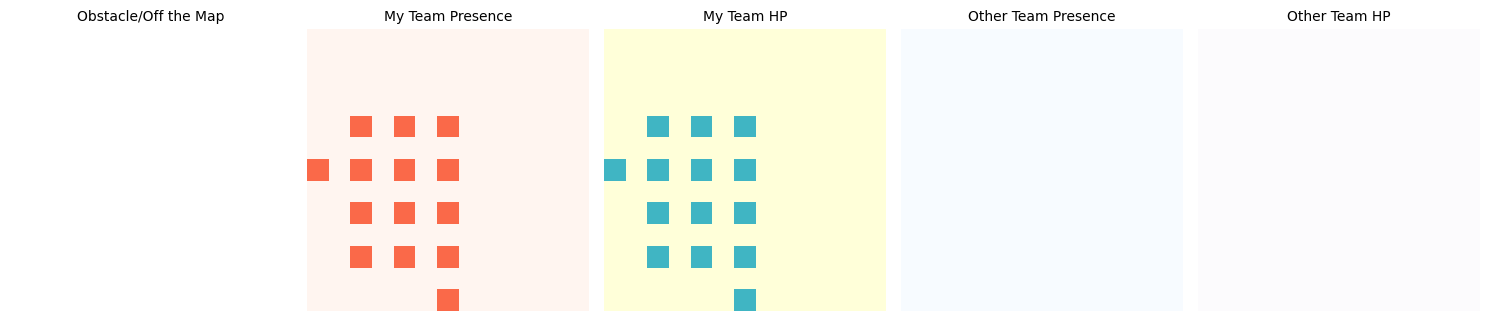

In [77]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))


for i, channel in enumerate(channel_names):
    ax = axes[i]
    ax.imshow(np.fliplr(env.observe(f"blue_{1}")[:, :, i]), cmap=channel_to_cmap[channel], vmin=0, vmax=2)
    ax.set_title(channel_names[i], fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()

agent: red_0
agent: blue_0


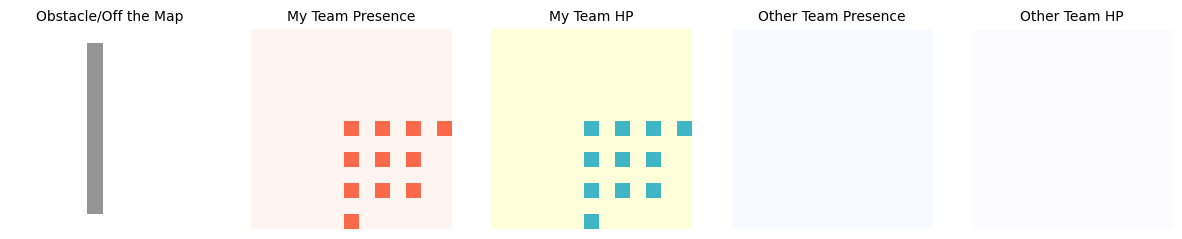

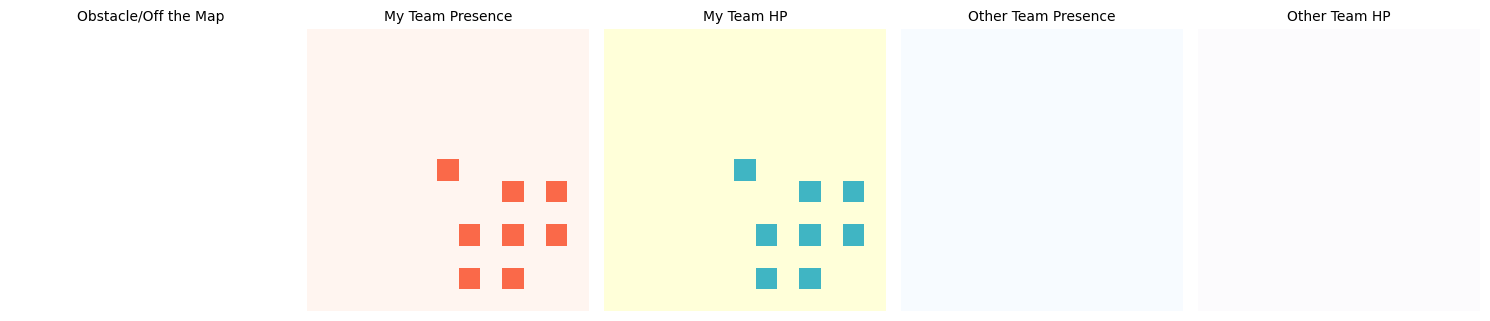

agent: red_1
agent: blue_1


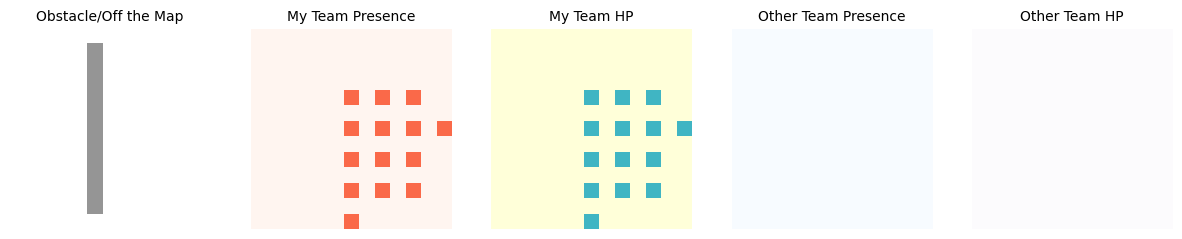

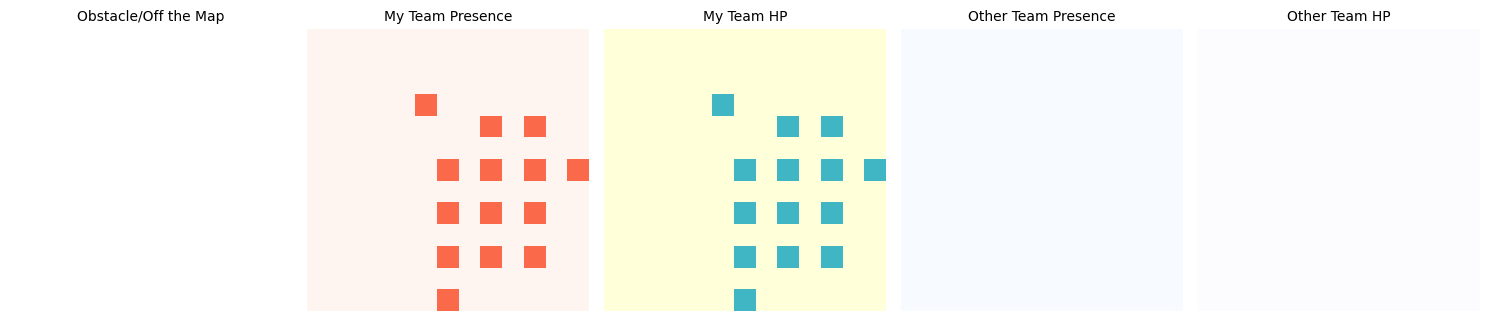

agent: red_2
agent: blue_2


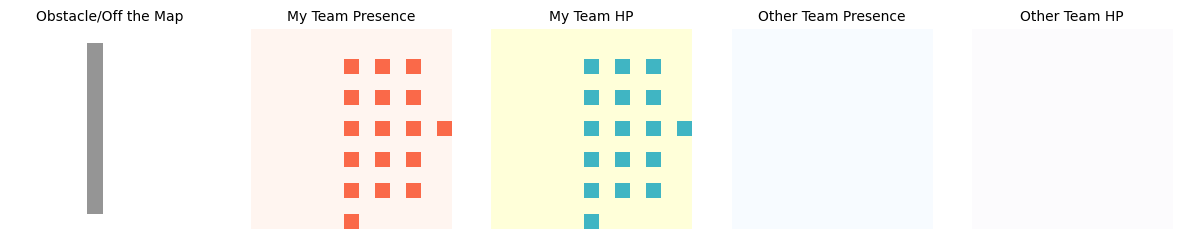

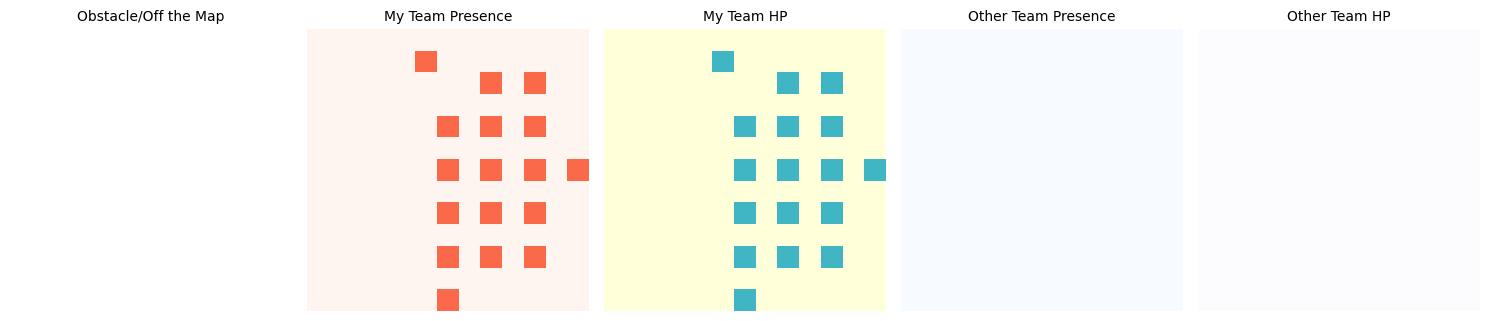

agent: red_3
agent: blue_3


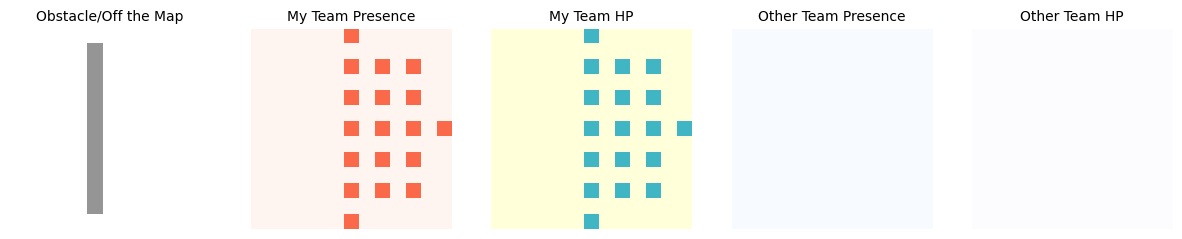

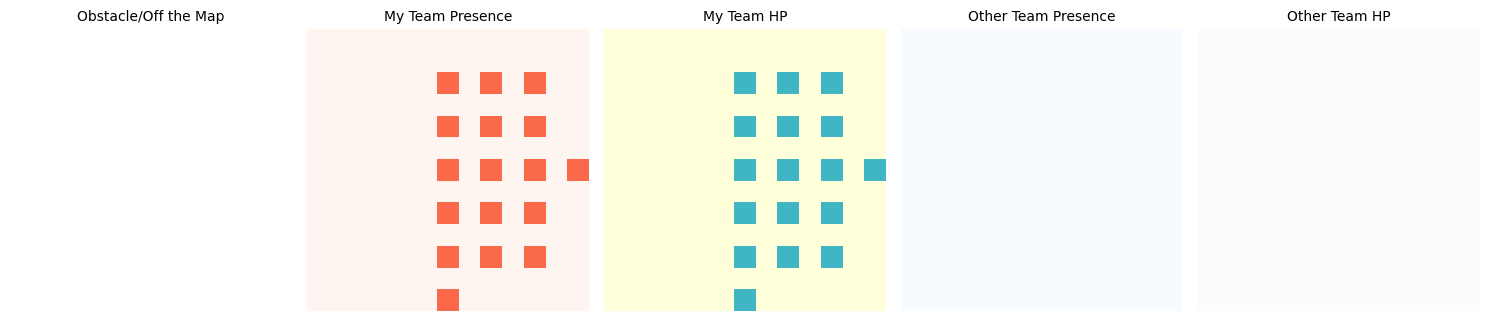

agent: red_4
agent: blue_4


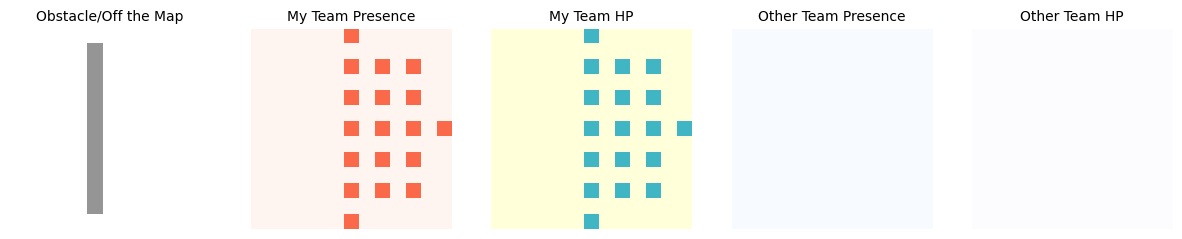

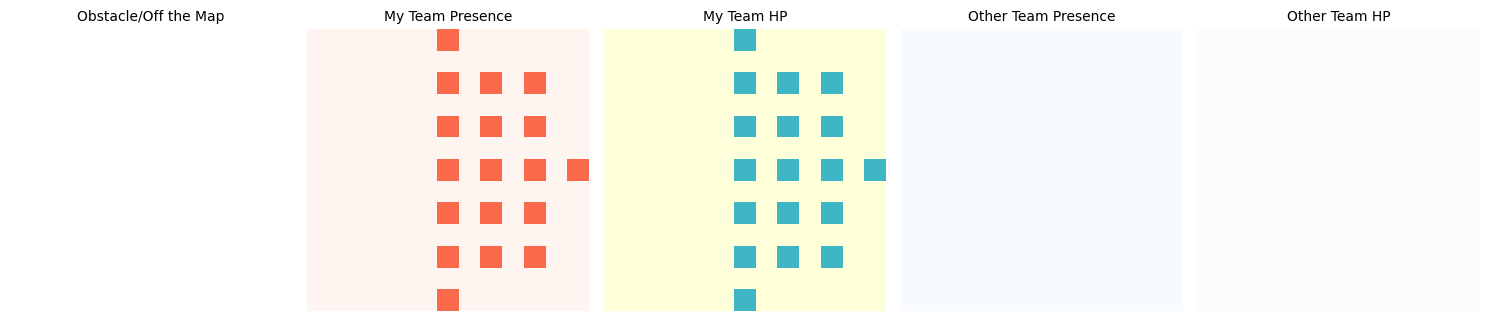

agent: red_5
agent: blue_5


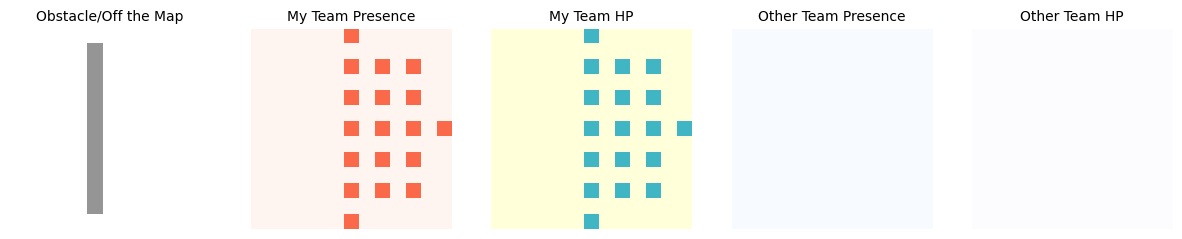

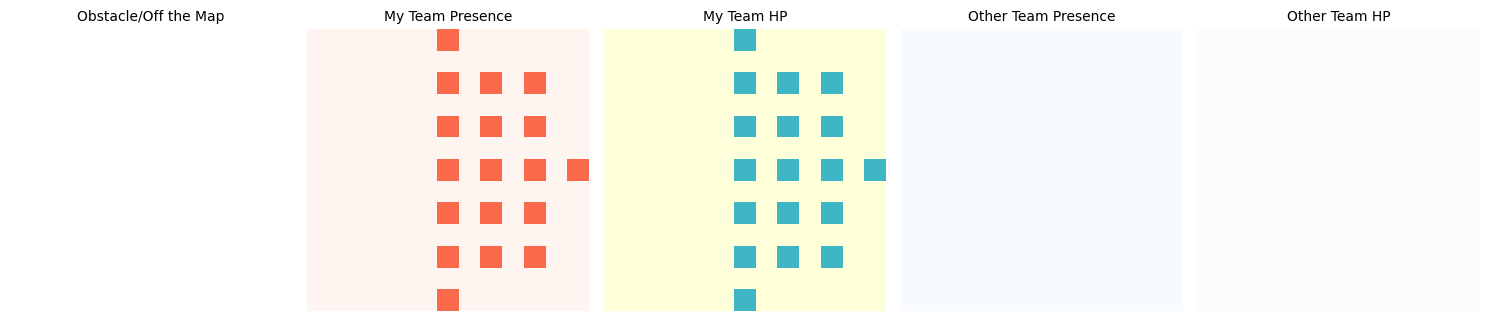

agent: red_6
agent: blue_6


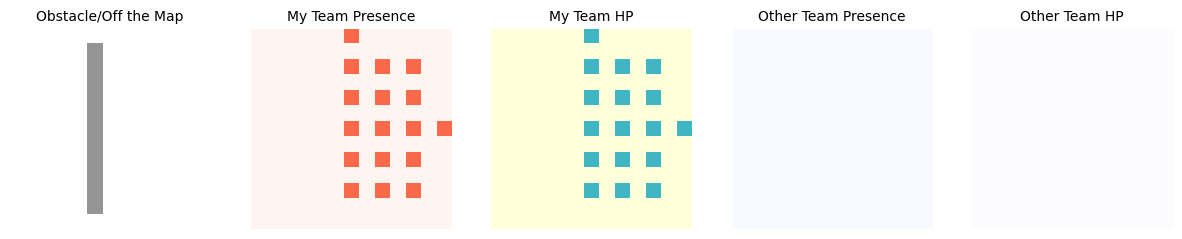

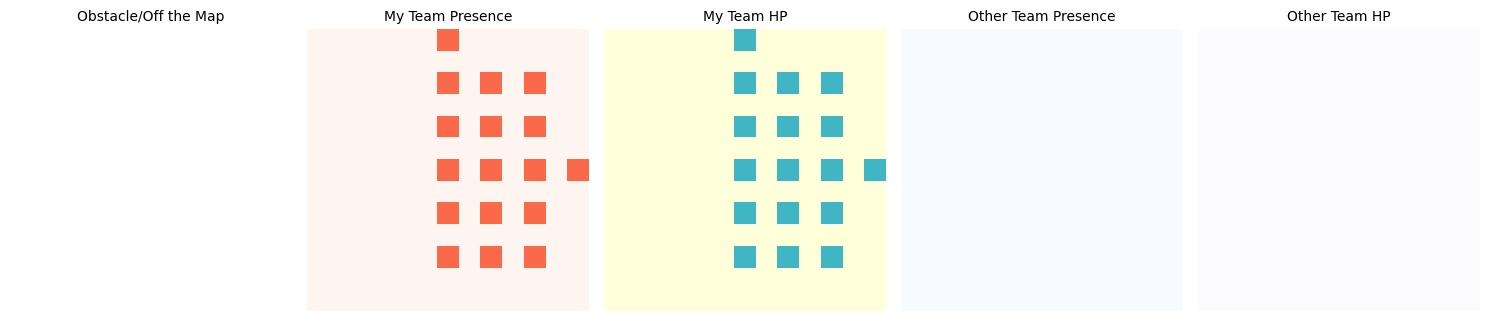

agent: red_7
agent: blue_7


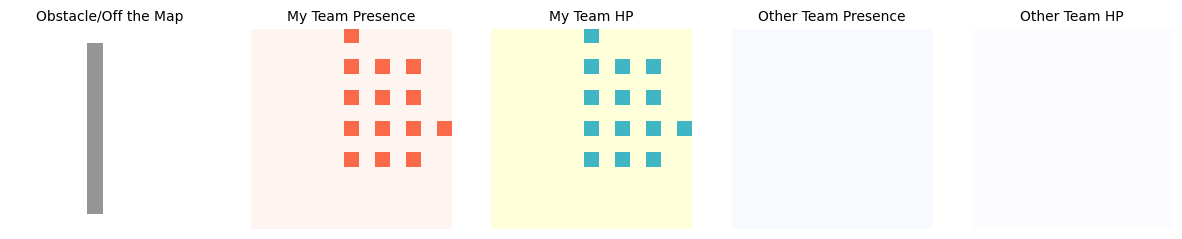

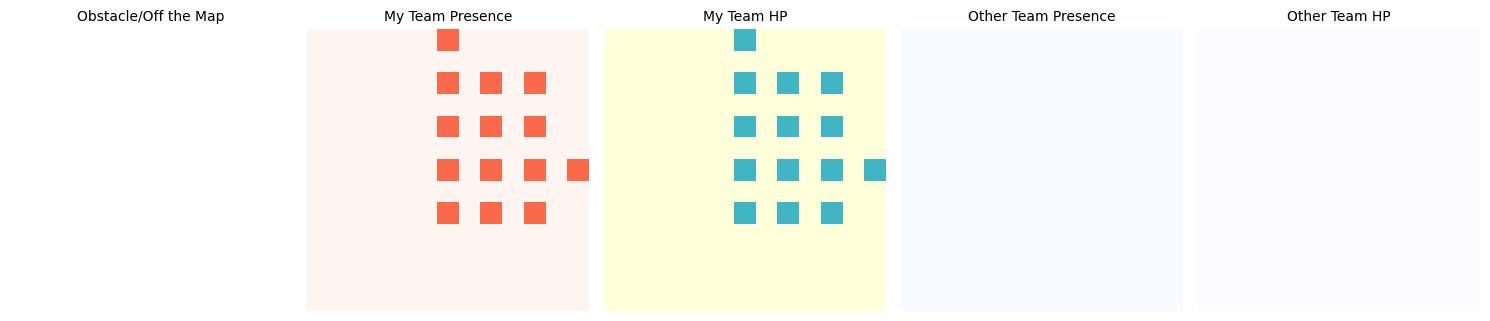

agent: red_8
agent: blue_8


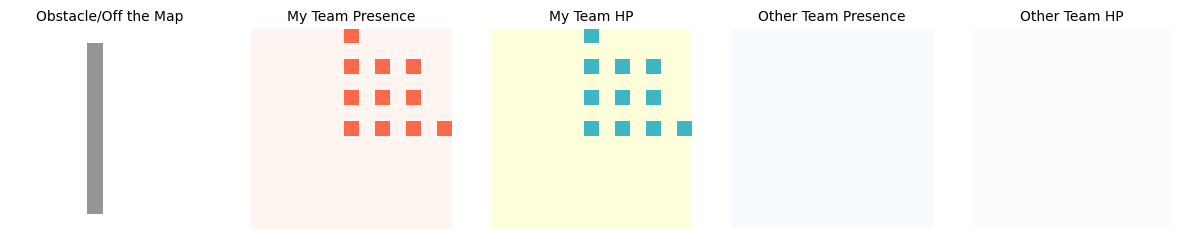

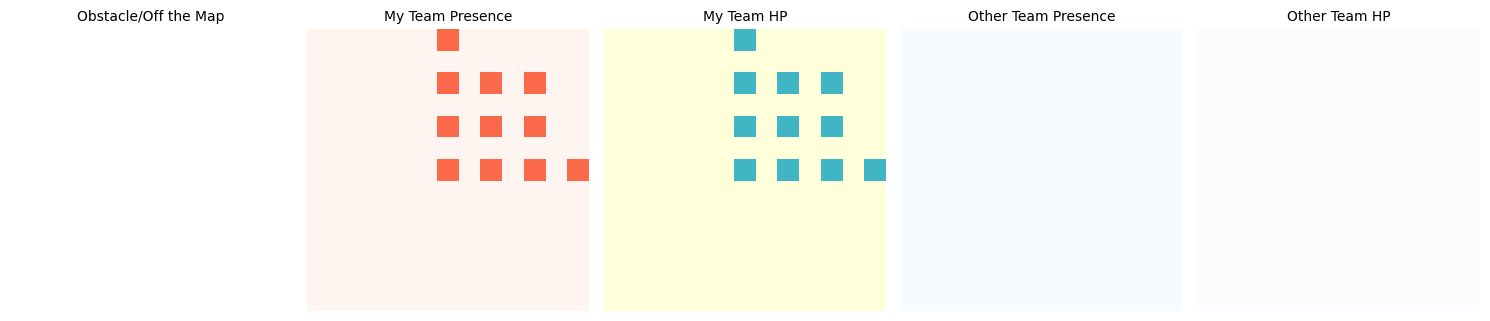

agent: red_9
agent: blue_9


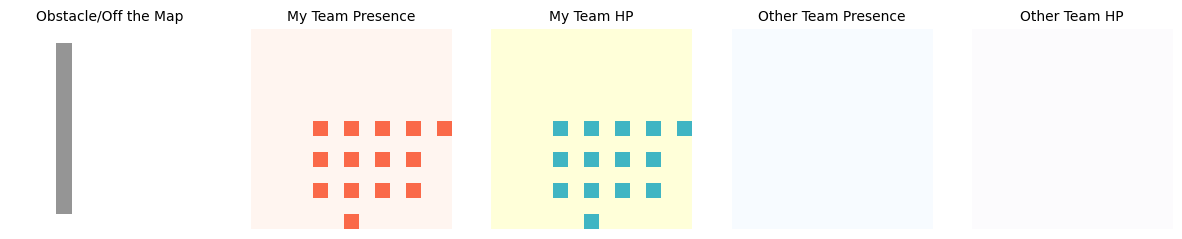

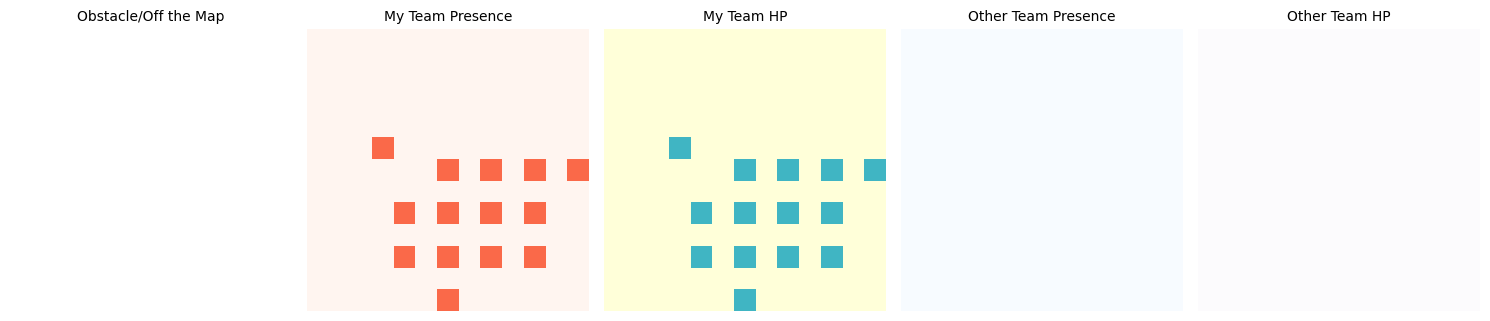

agent: red_10
agent: blue_10


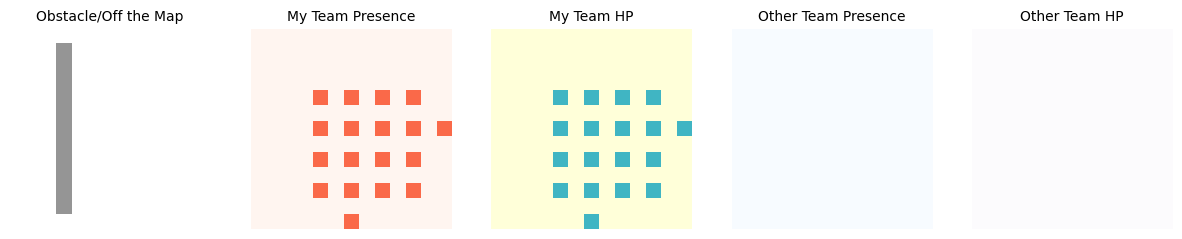

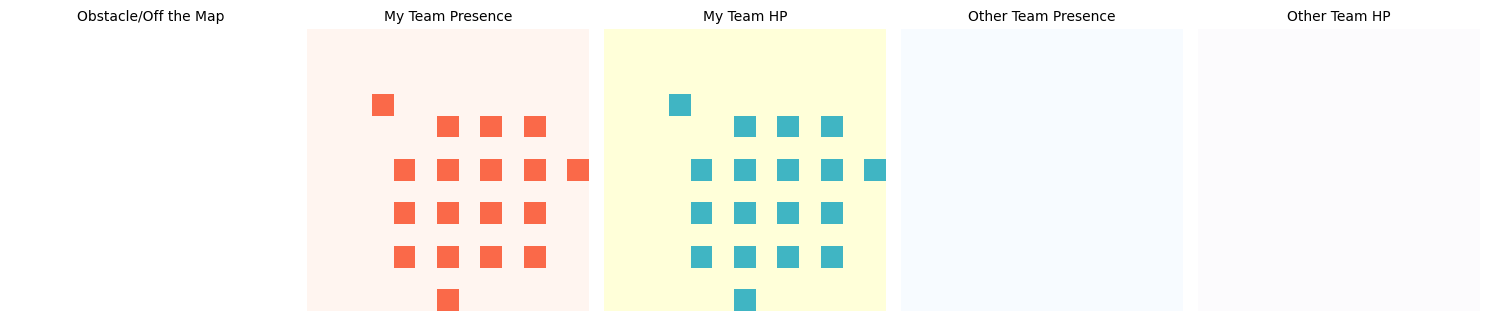

agent: red_11
agent: blue_11


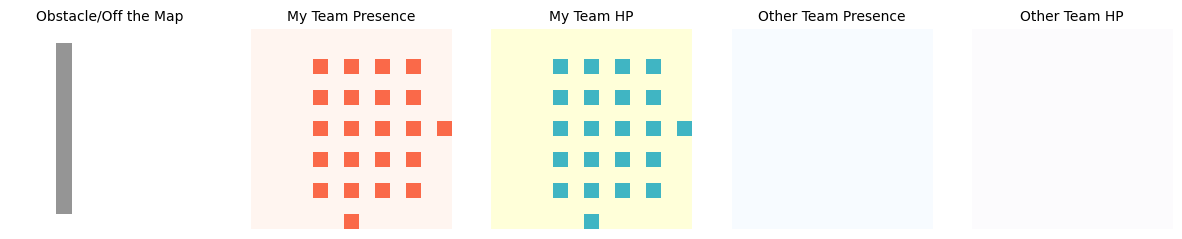

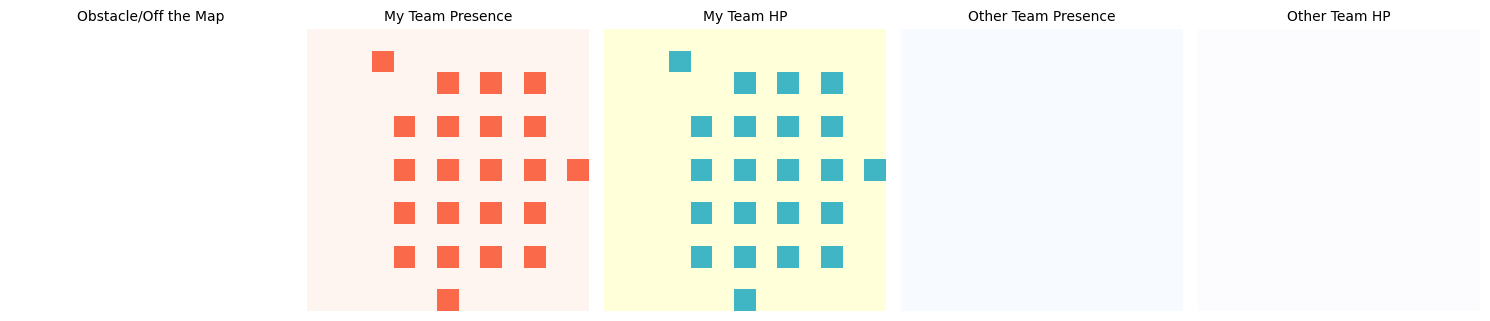

agent: red_12
agent: blue_12


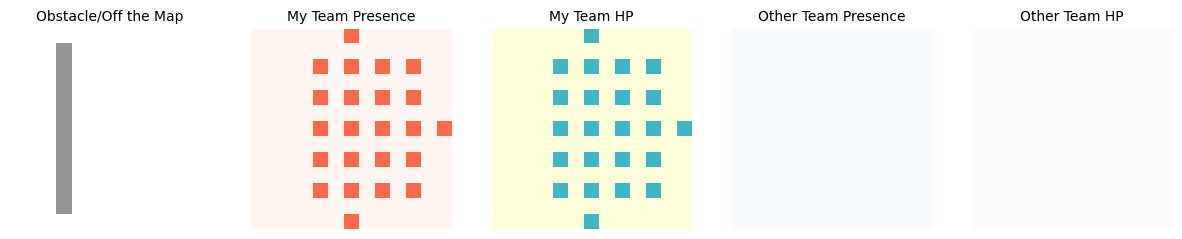

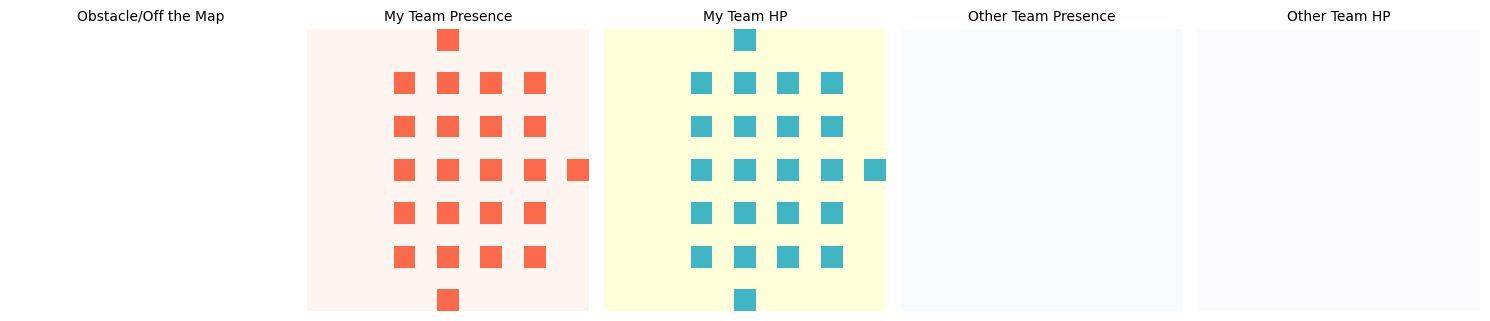

agent: red_13
agent: blue_13


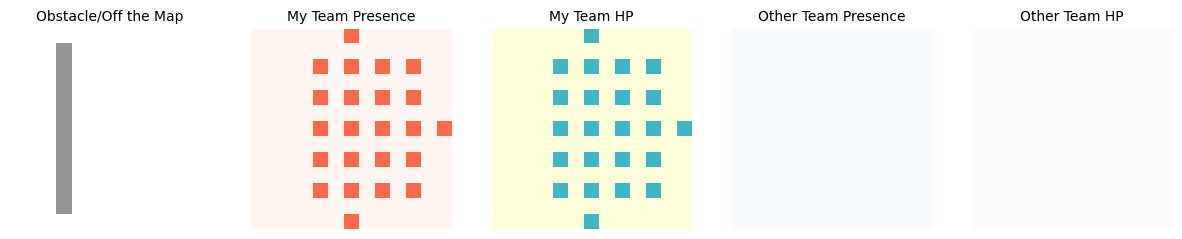

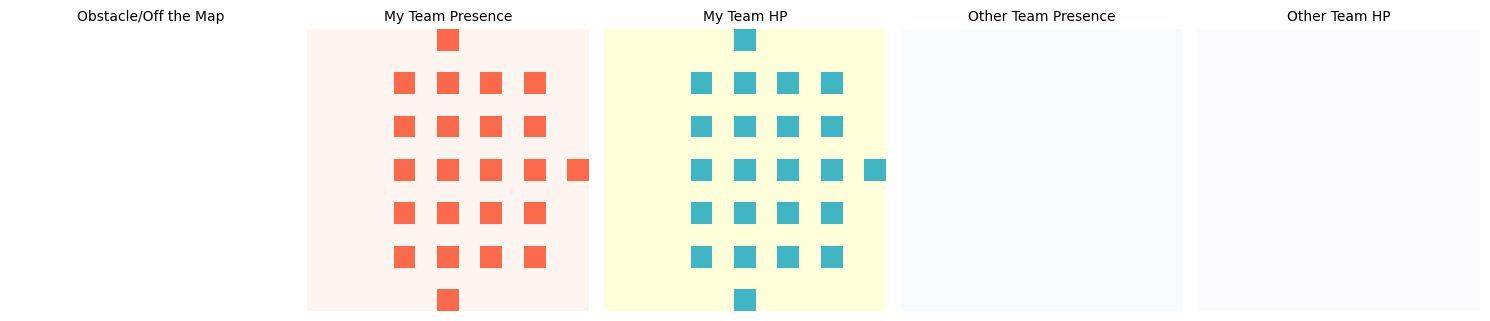

agent: red_14
agent: blue_14


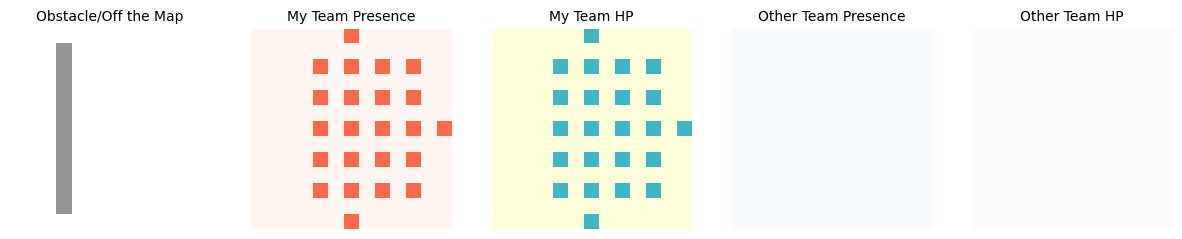

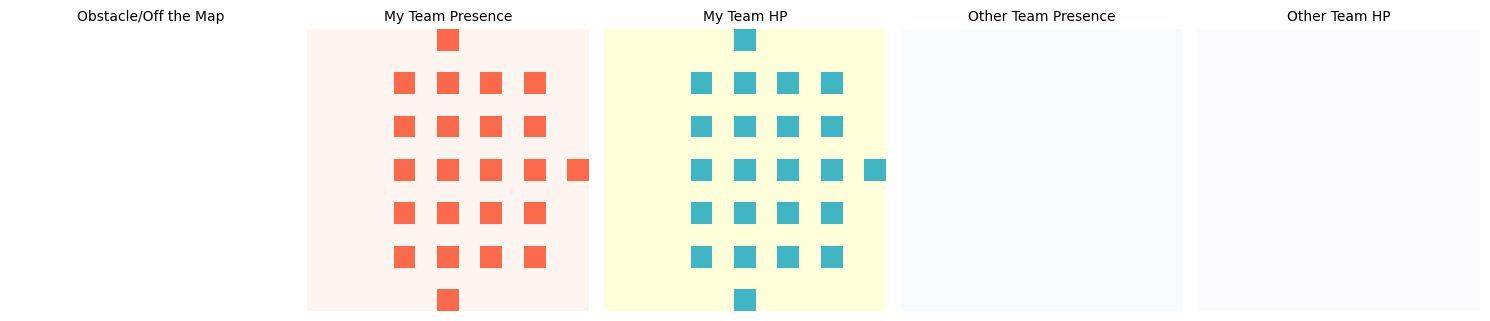

agent: red_15
agent: blue_15


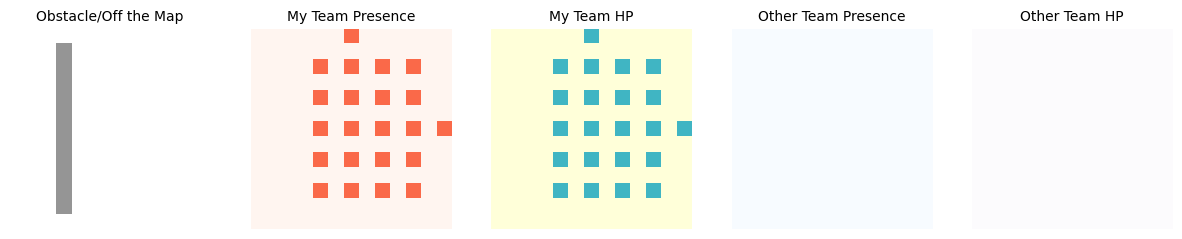

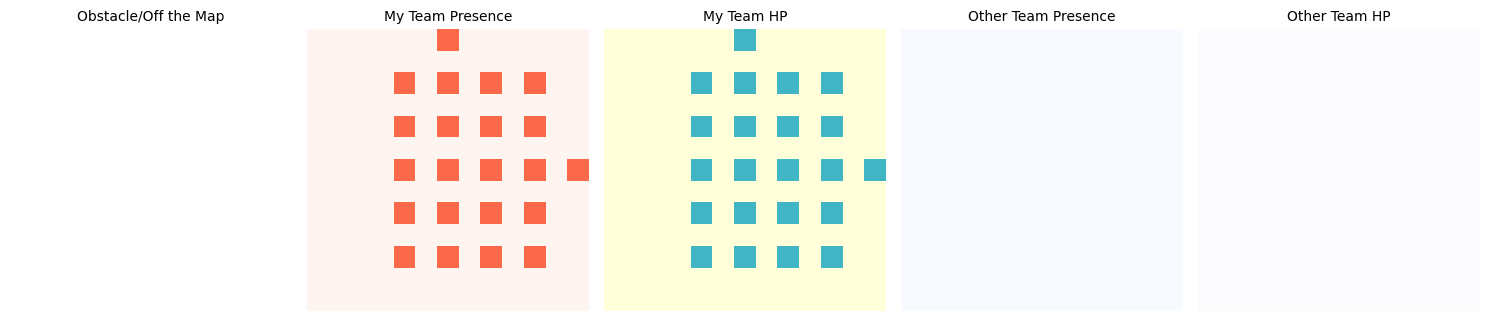

agent: red_16
agent: blue_16


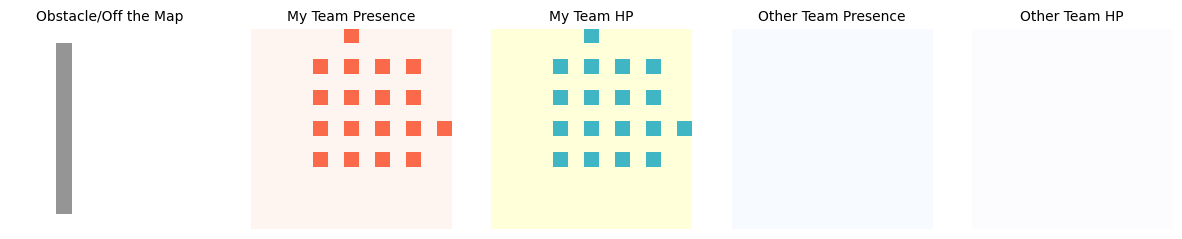

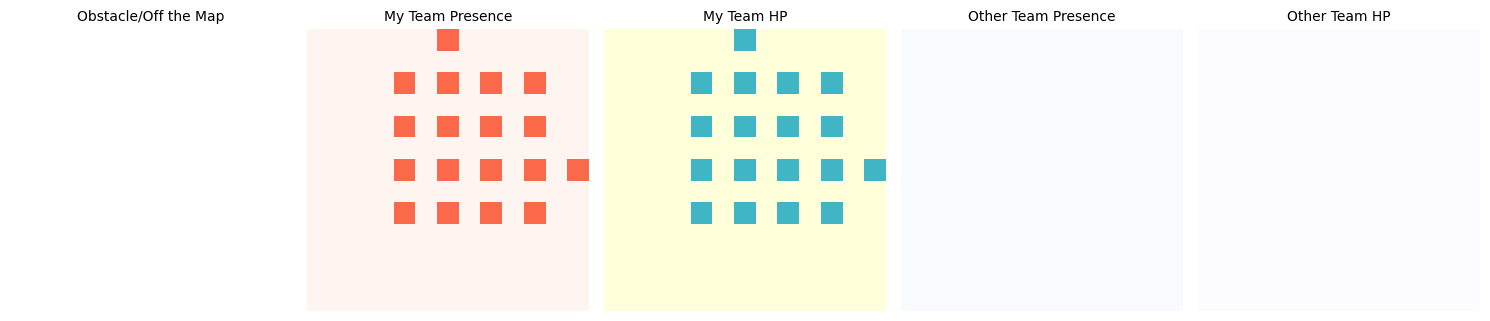

agent: red_17
agent: blue_17


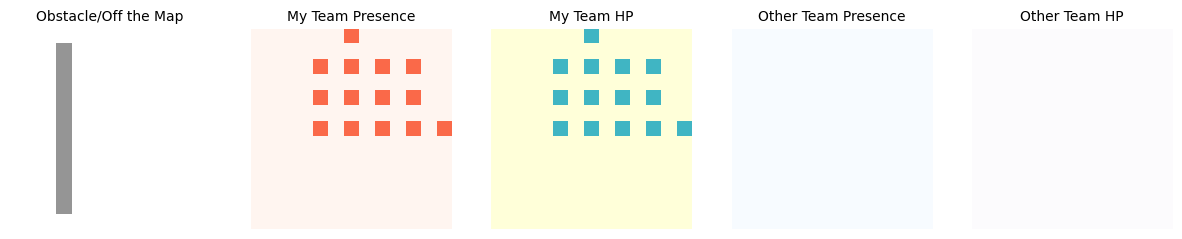

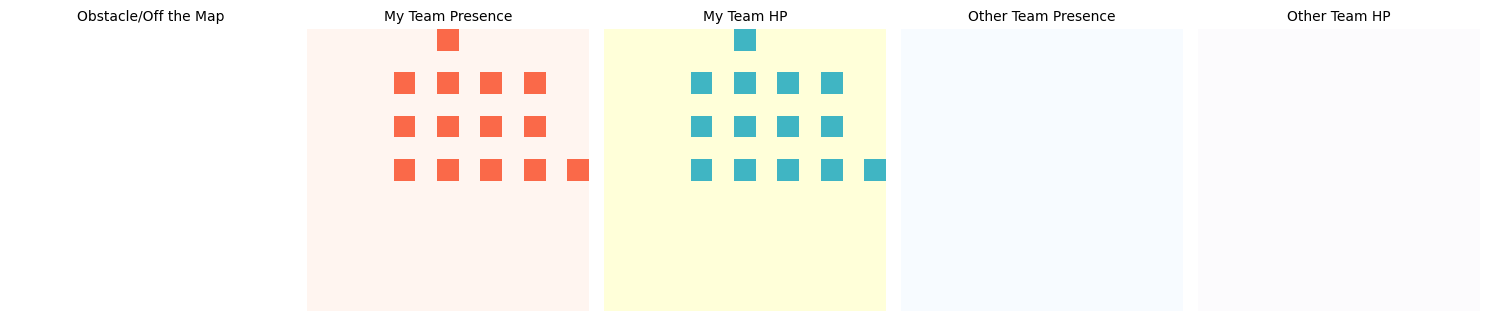

agent: red_18
agent: blue_18


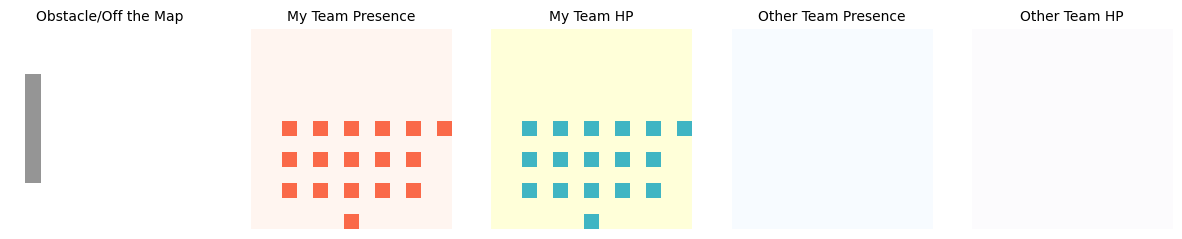

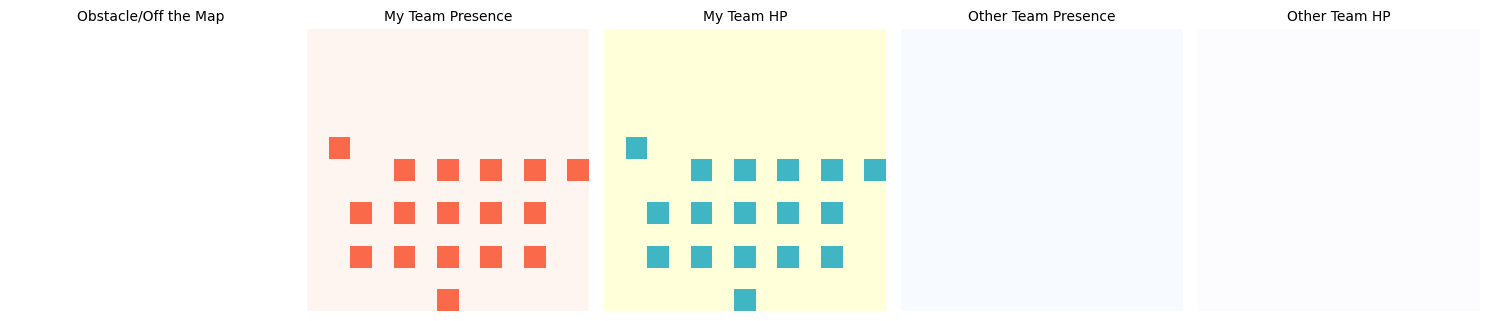

agent: red_19
agent: blue_19


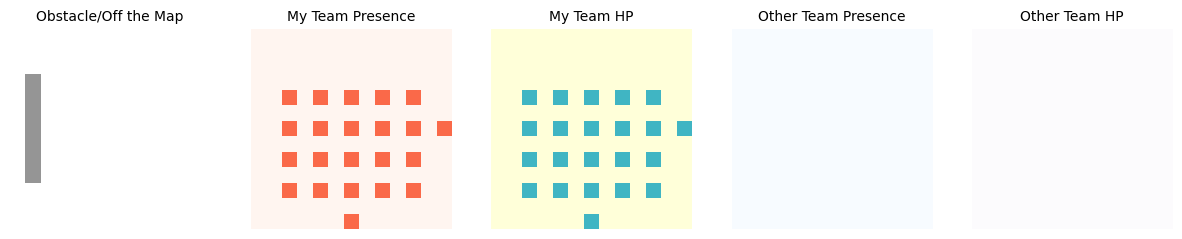

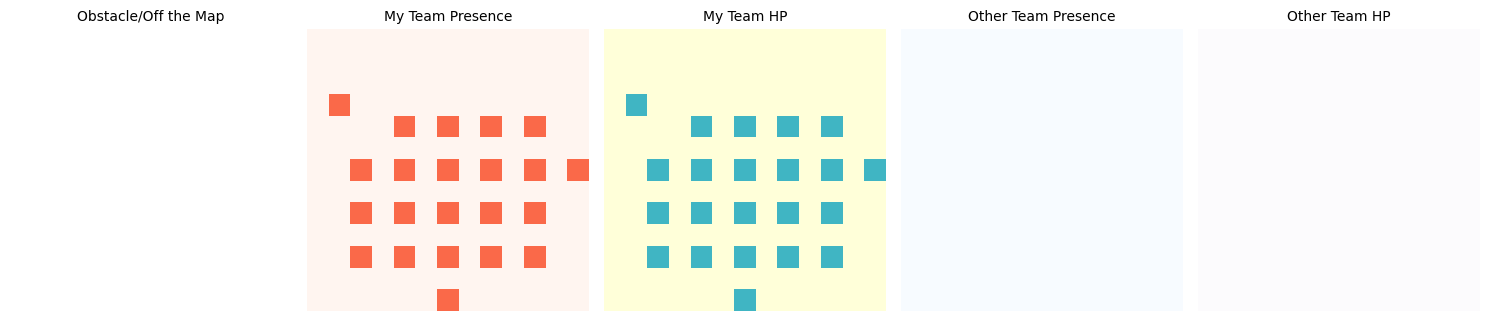

agent: red_20
agent: blue_20


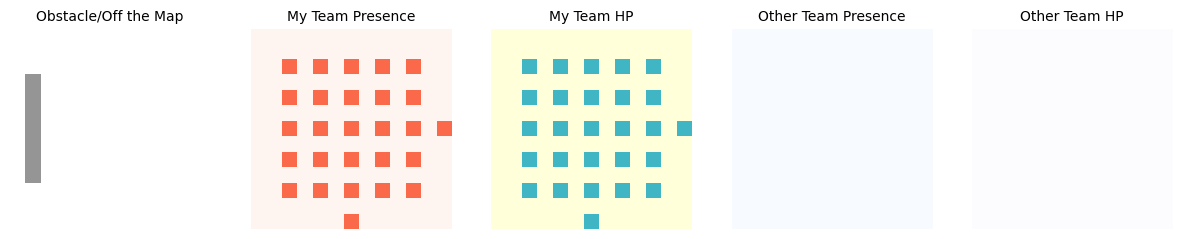

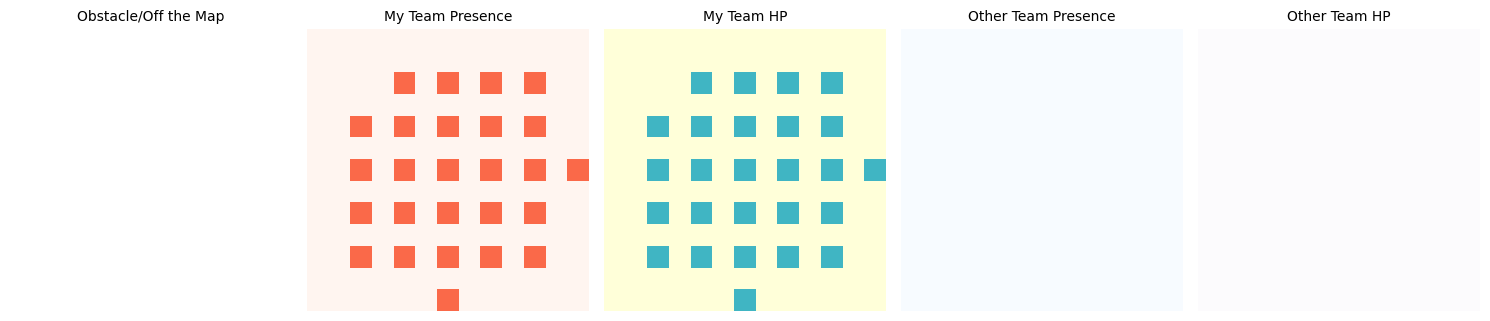

agent: red_21
agent: blue_21


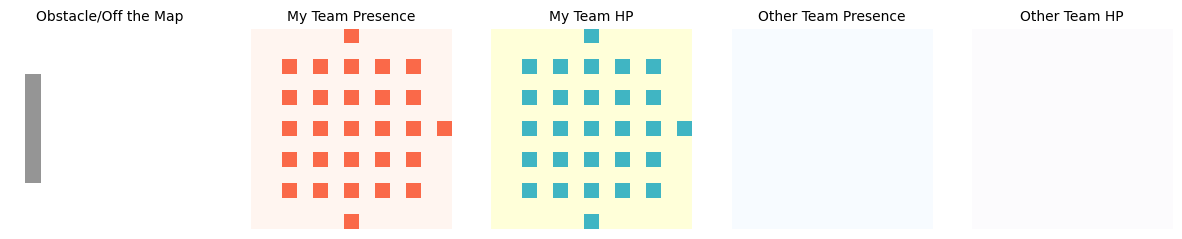

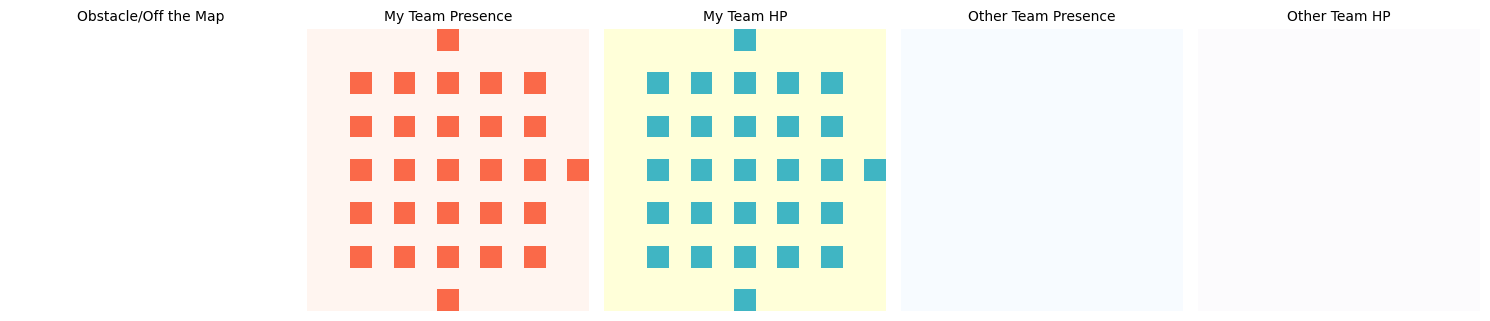

agent: red_22
agent: blue_22


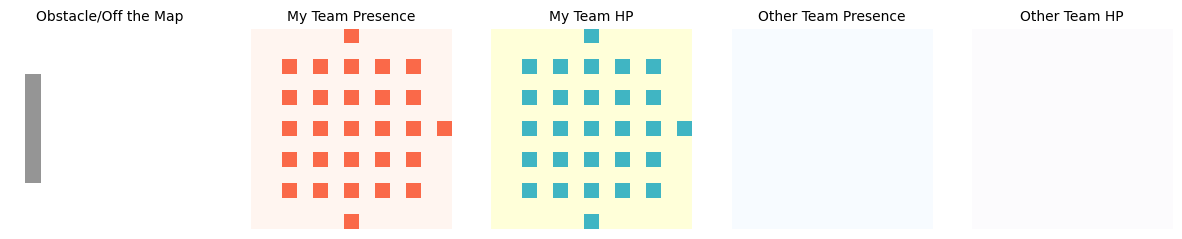

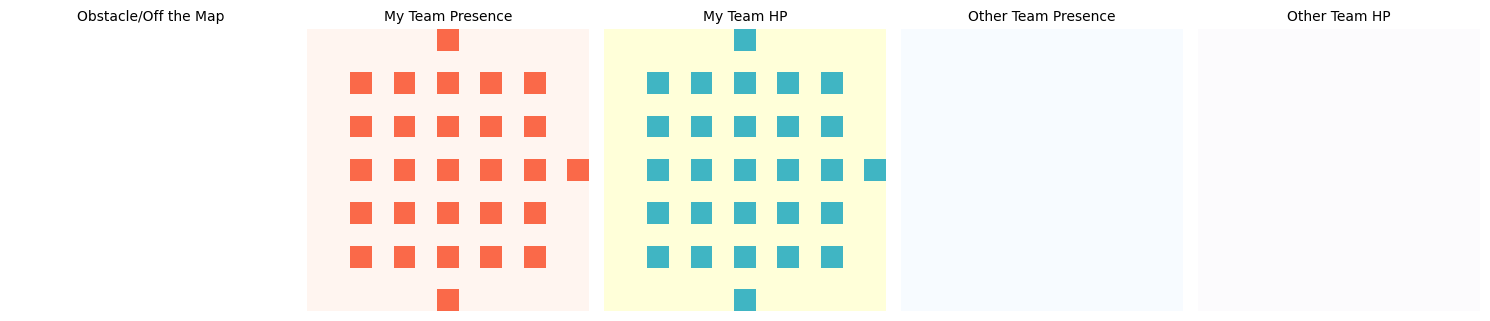

agent: red_23
agent: blue_23


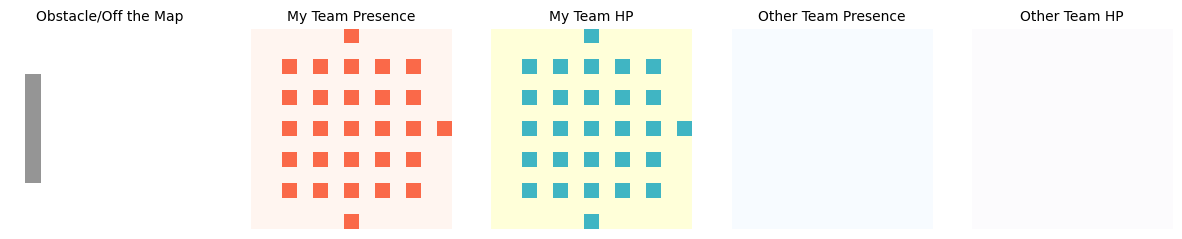

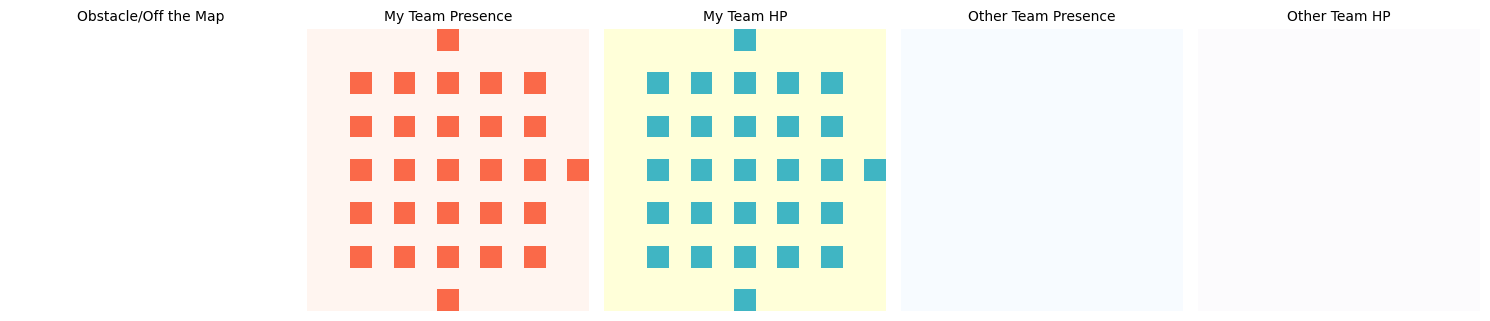

agent: red_24
agent: blue_24


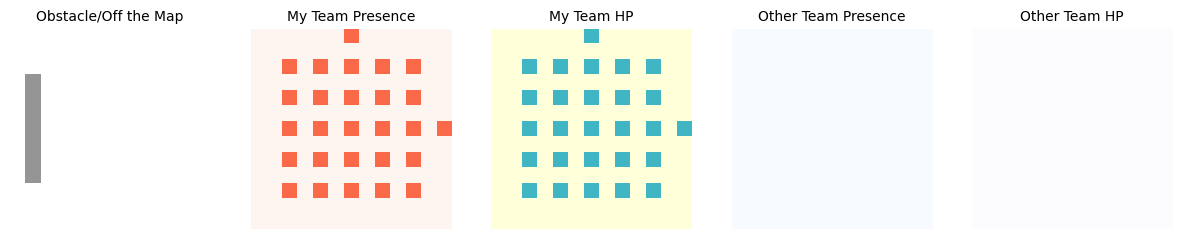

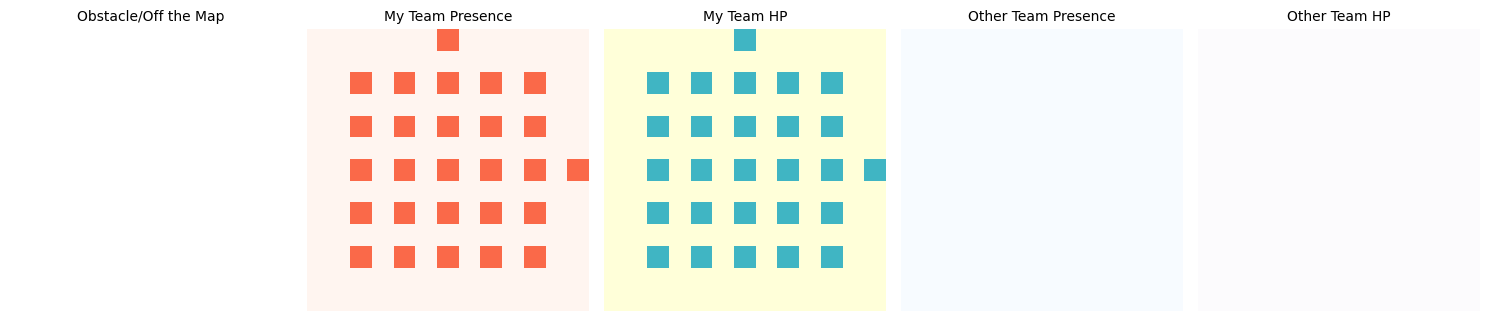

agent: red_25
agent: blue_25


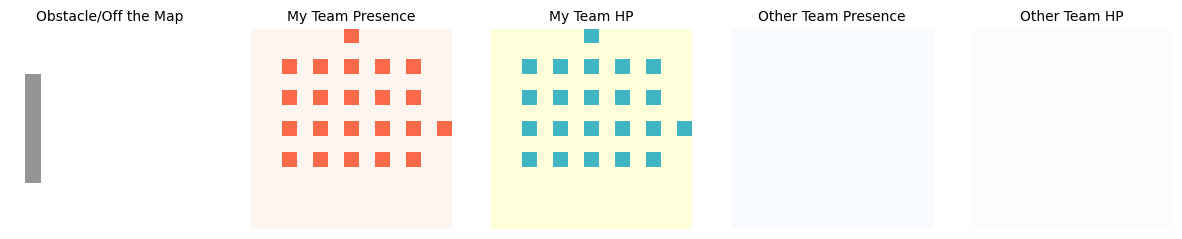

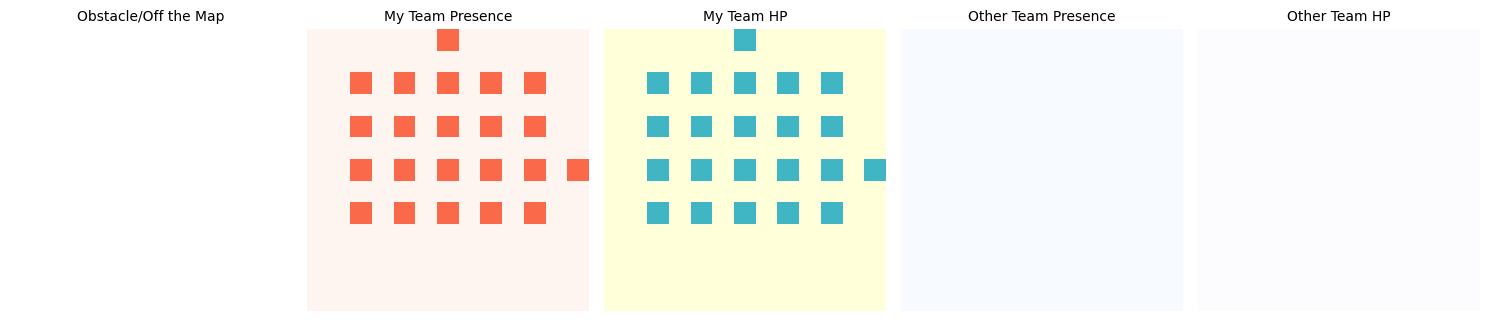

agent: red_26
agent: blue_26


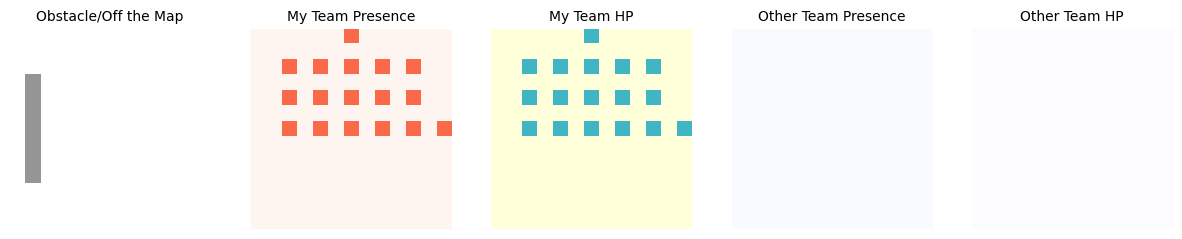

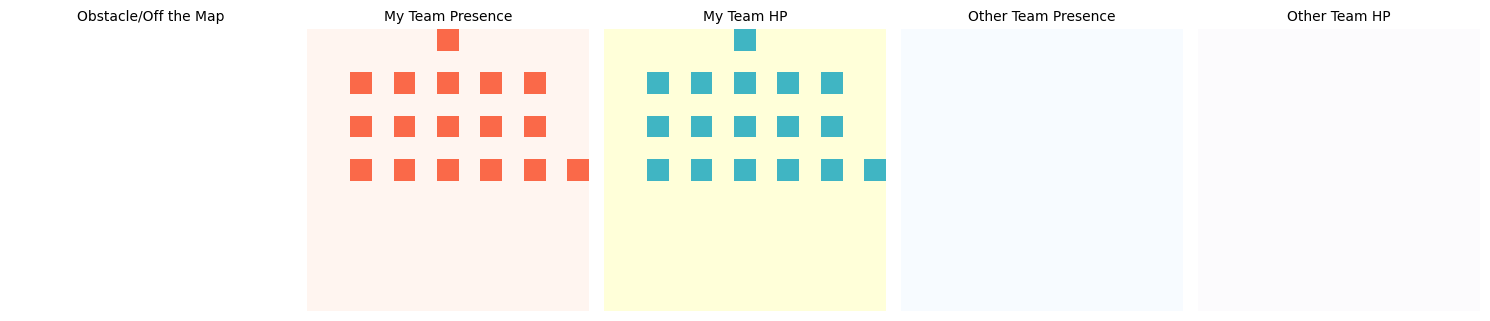

agent: red_27
agent: blue_27


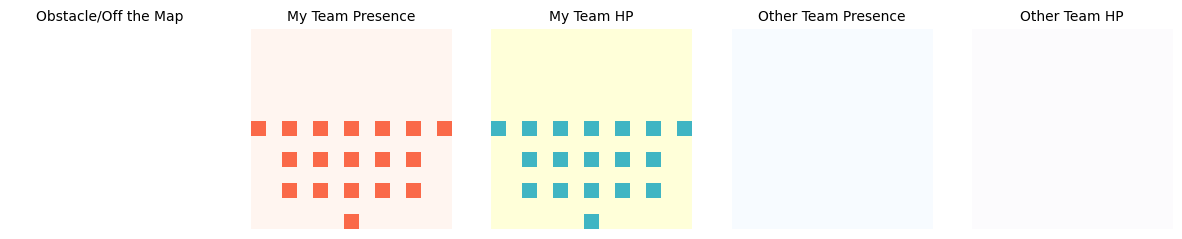

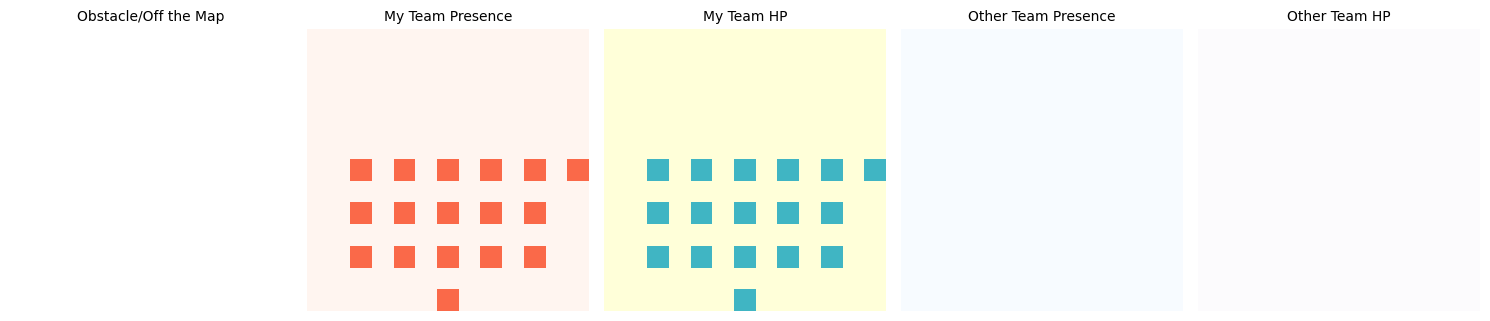

agent: red_28
agent: blue_28


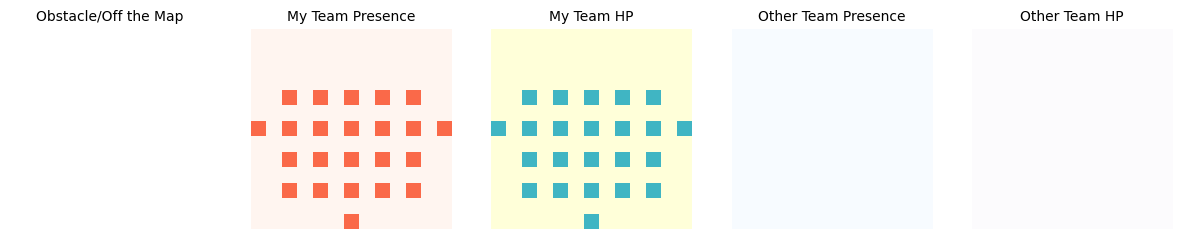

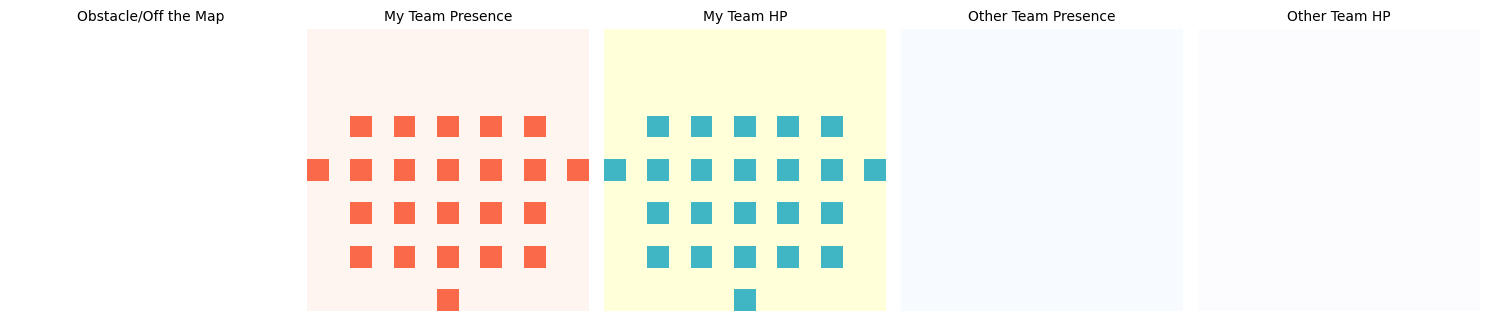

agent: red_29
agent: blue_29


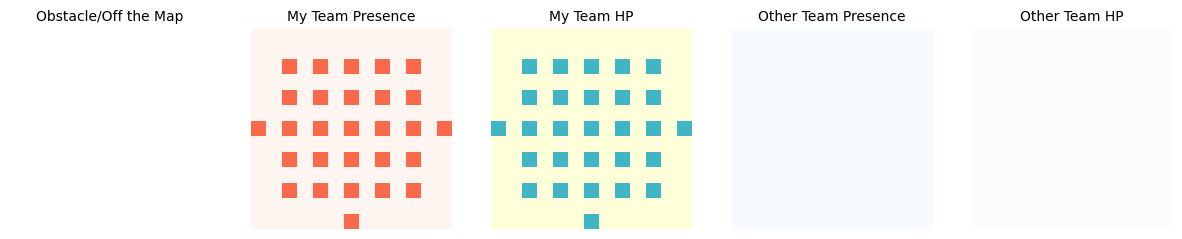

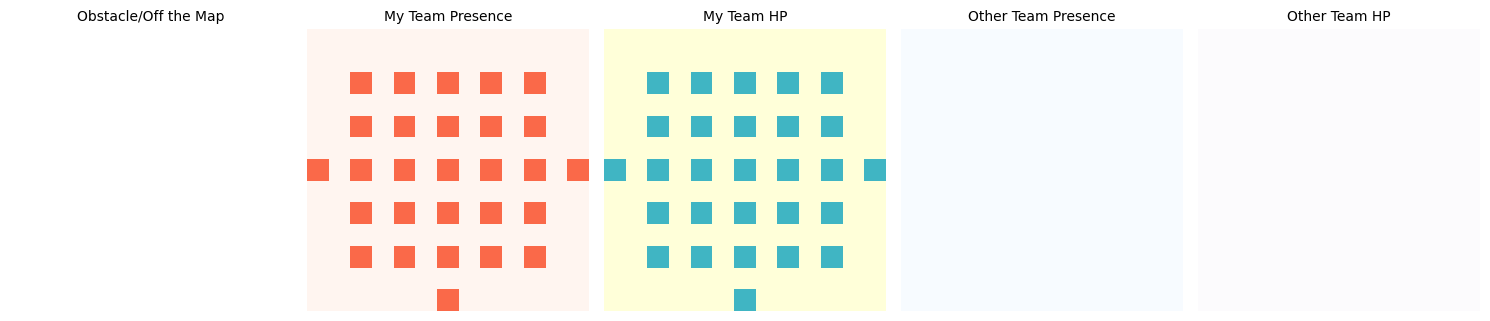

agent: red_30
agent: blue_30


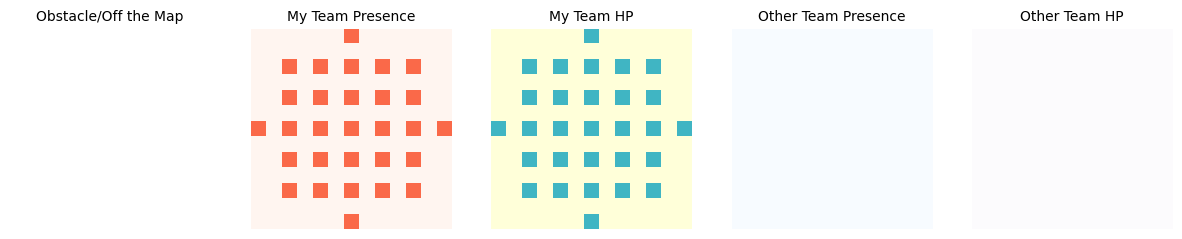

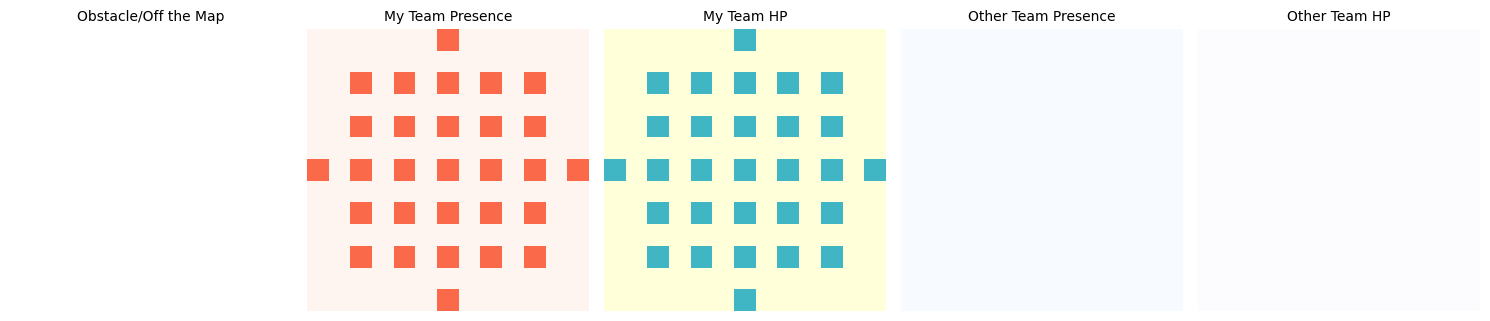

agent: red_31
agent: blue_31


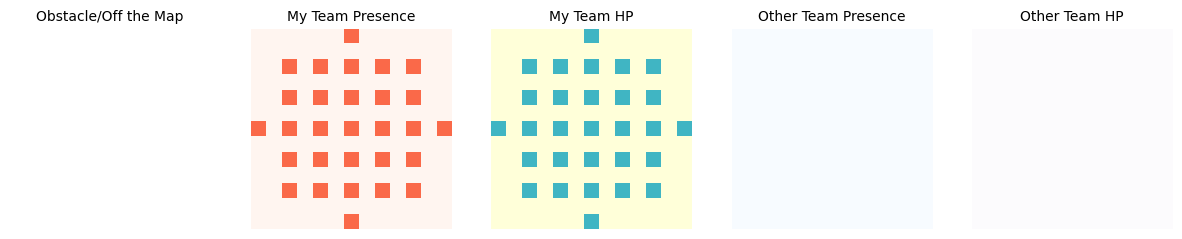

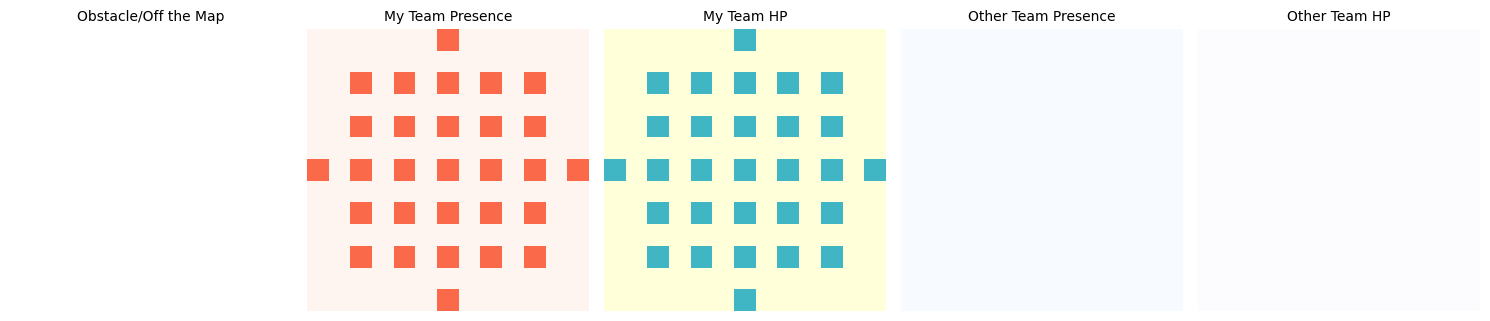

agent: red_32
agent: blue_32


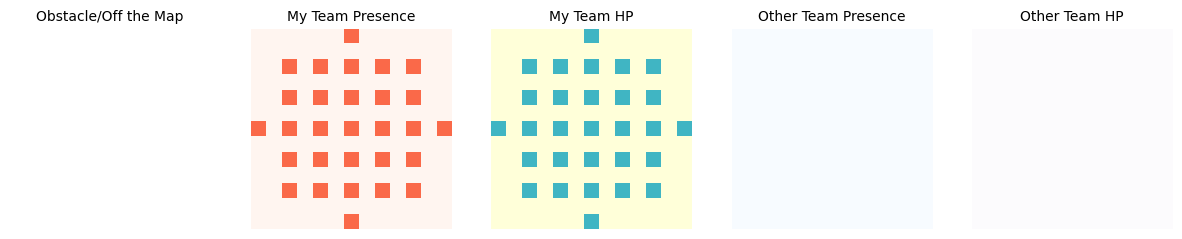

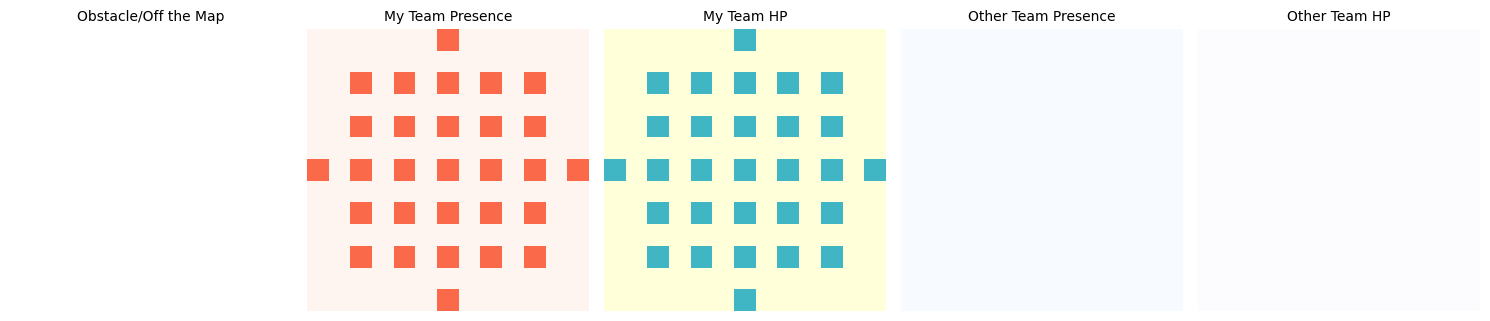

agent: red_33
agent: blue_33


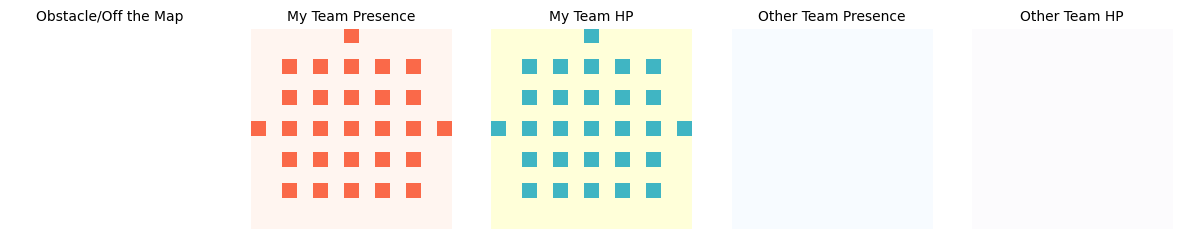

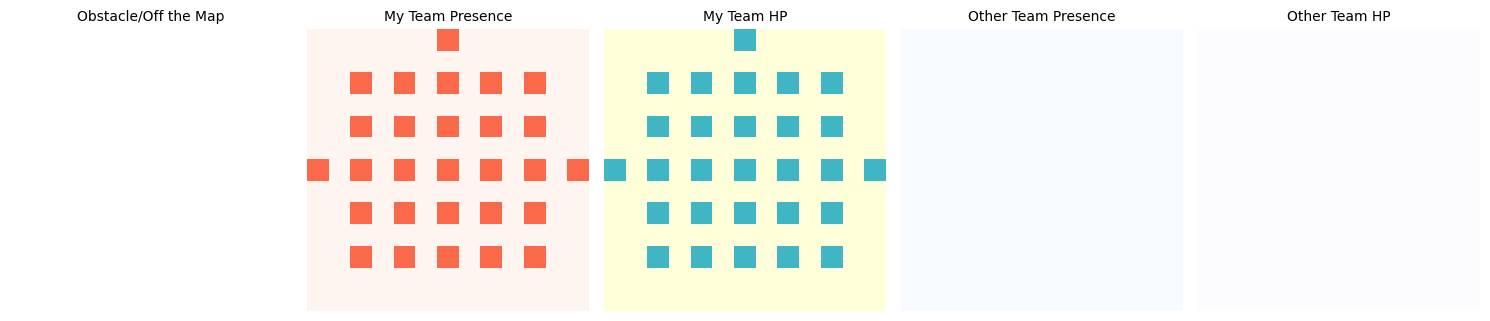

agent: red_34
agent: blue_34


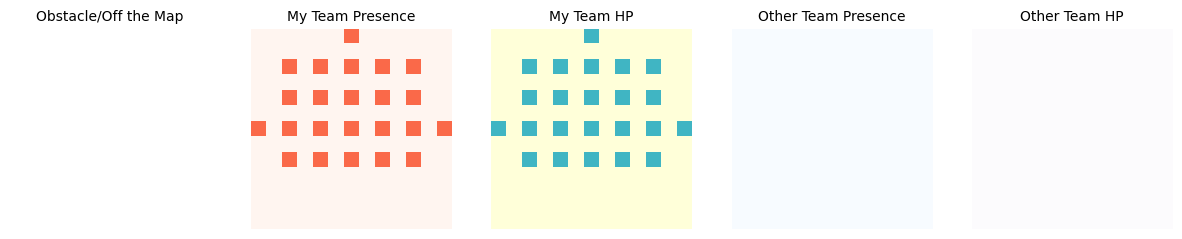

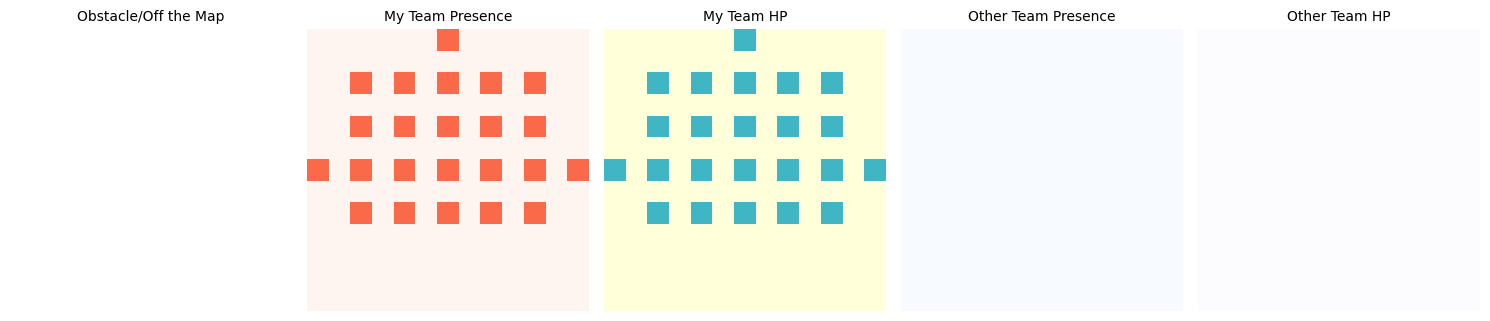

agent: red_35
agent: blue_35


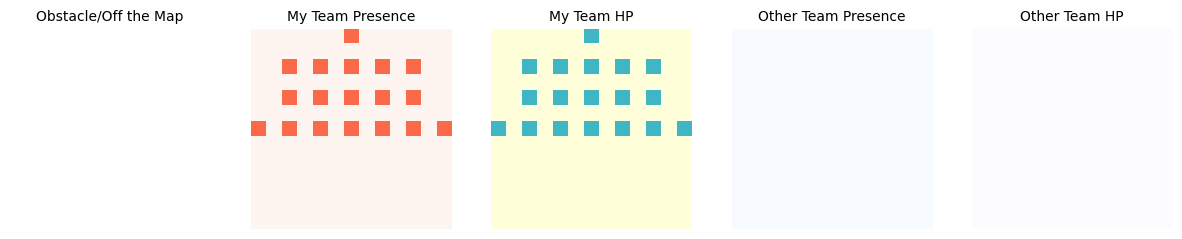

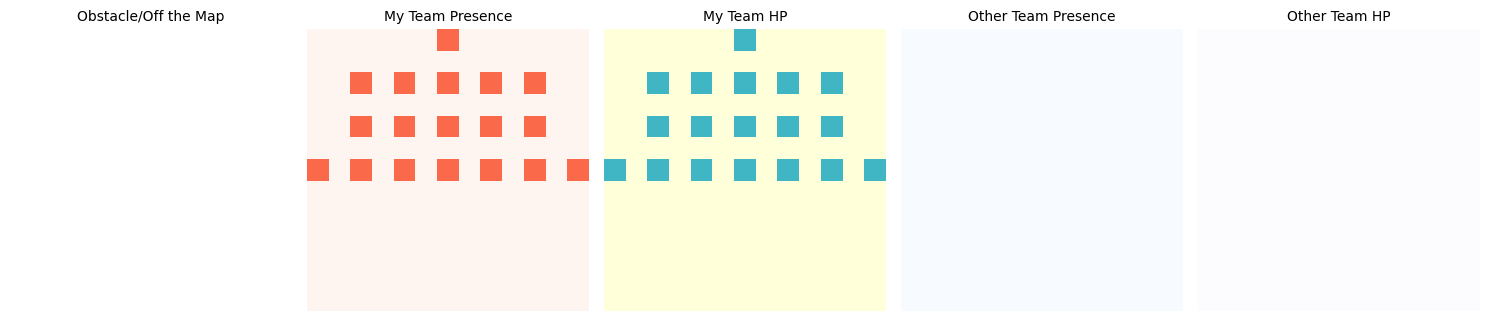

agent: red_36
agent: blue_36


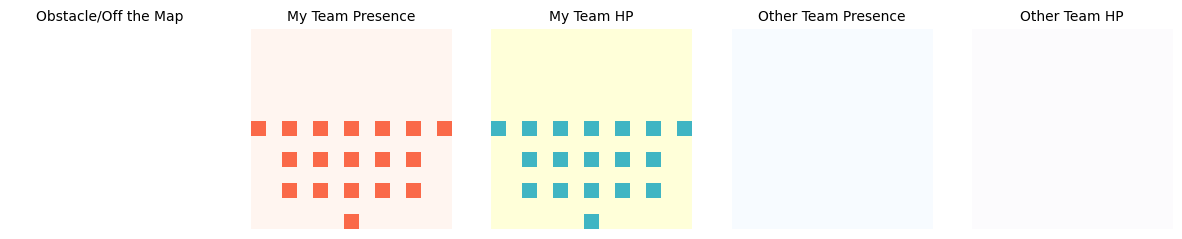

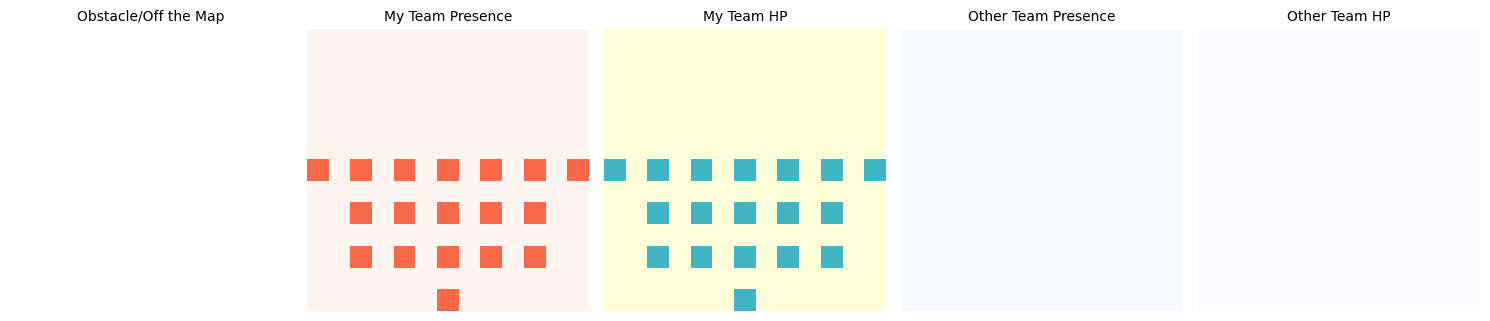

agent: red_37
agent: blue_37


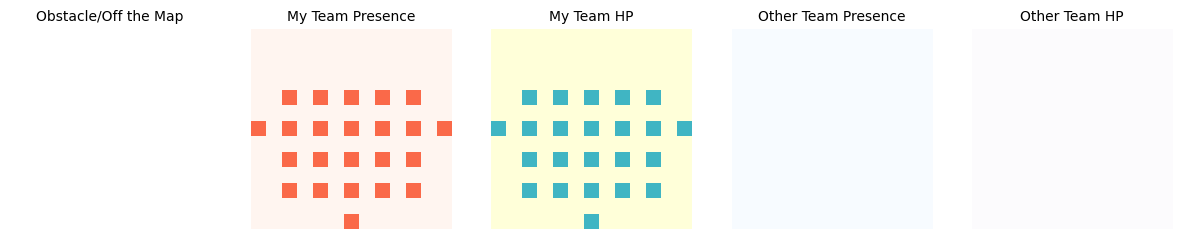

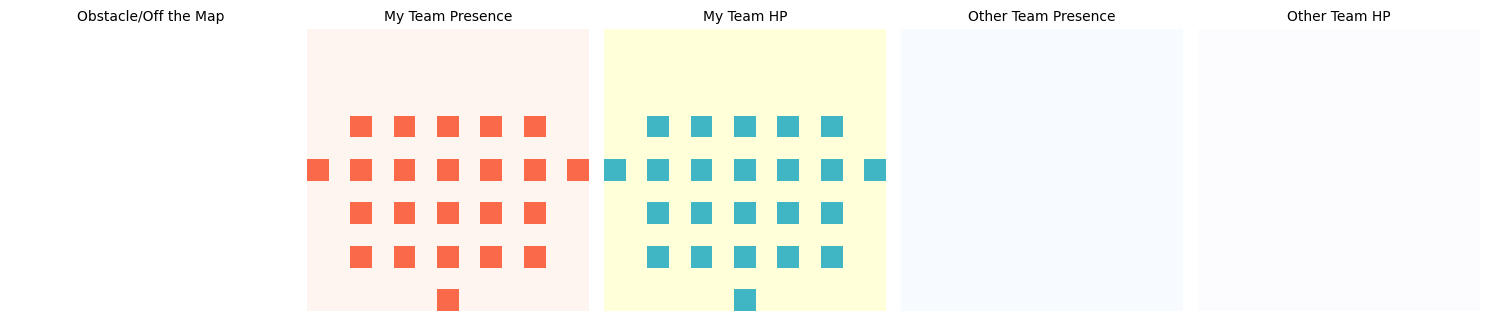

agent: red_38
agent: blue_38


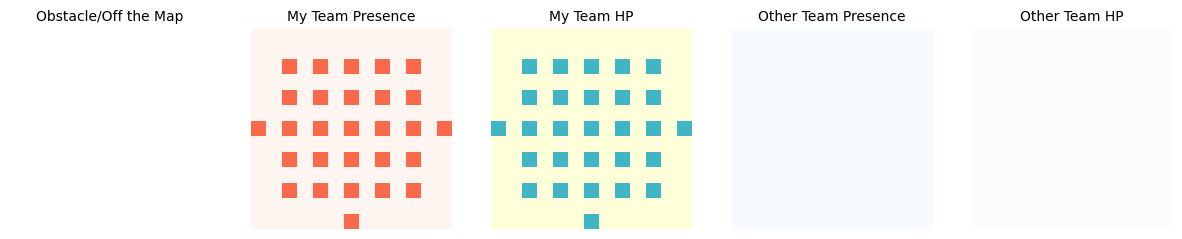

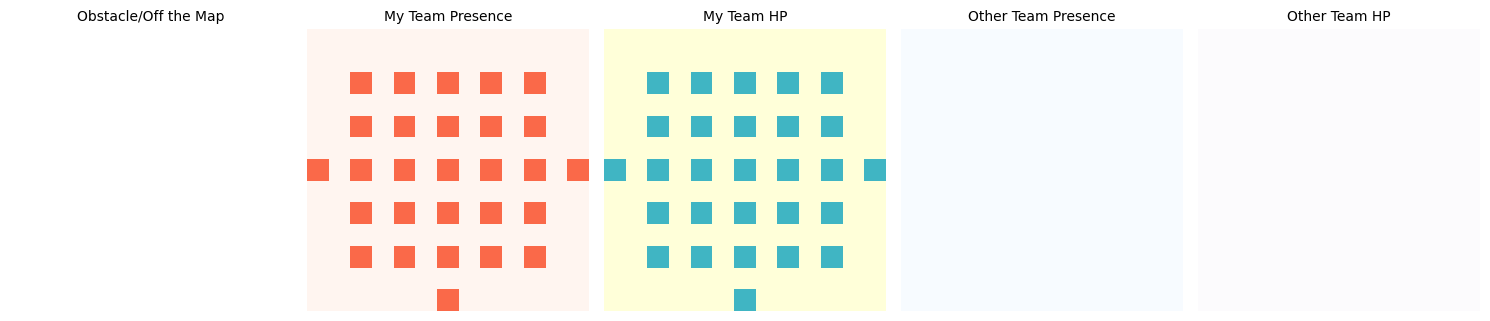

agent: red_39
agent: blue_39


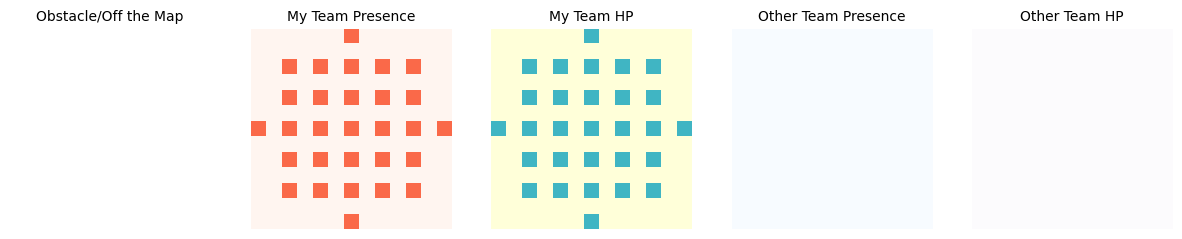

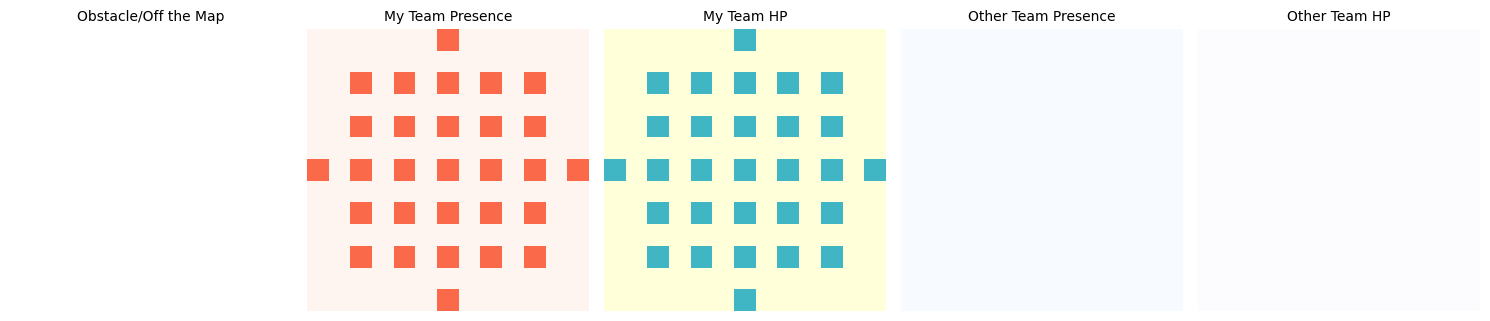

agent: red_40
agent: blue_40


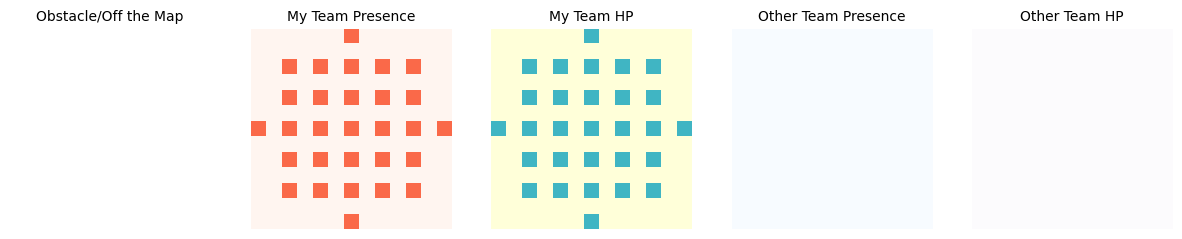

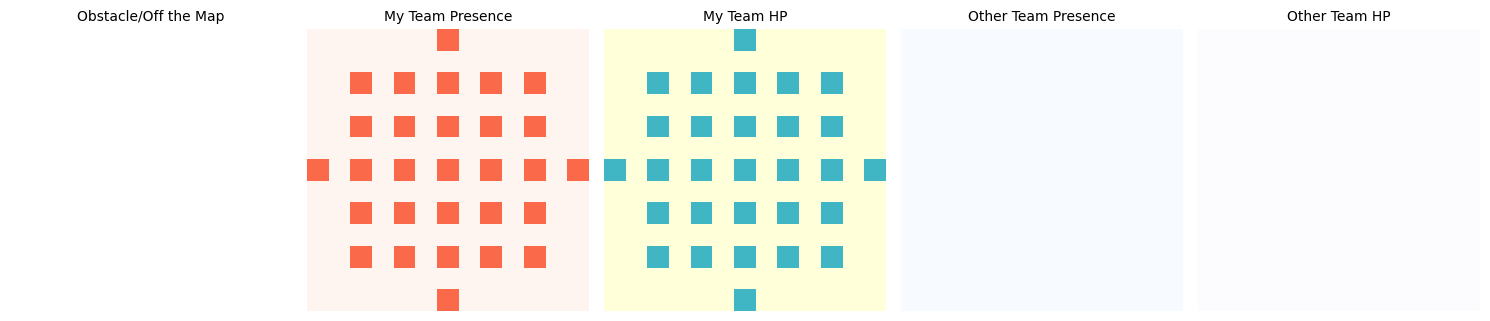

agent: red_41
agent: blue_41


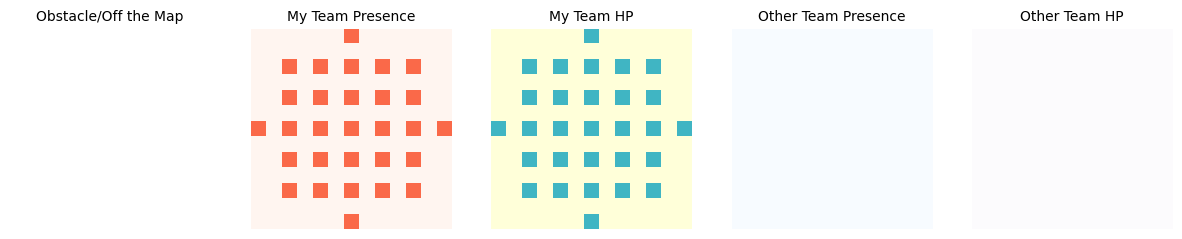

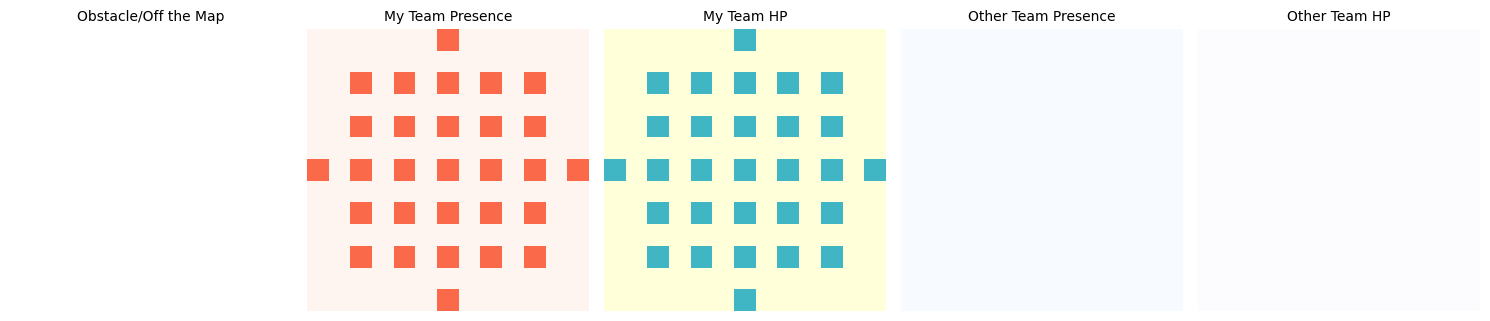

agent: red_42
agent: blue_42


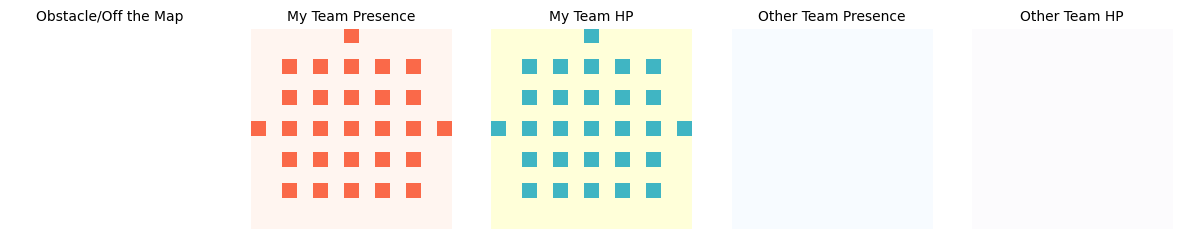

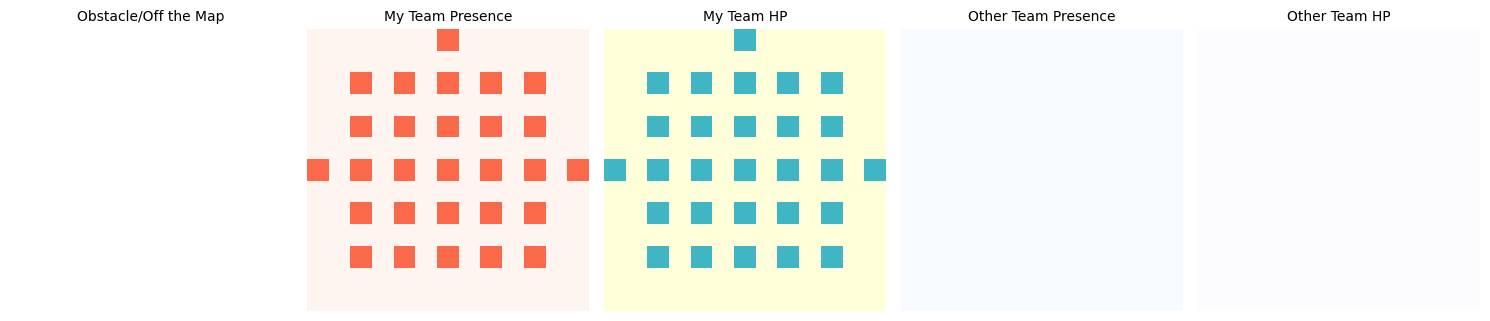

agent: red_43
agent: blue_43


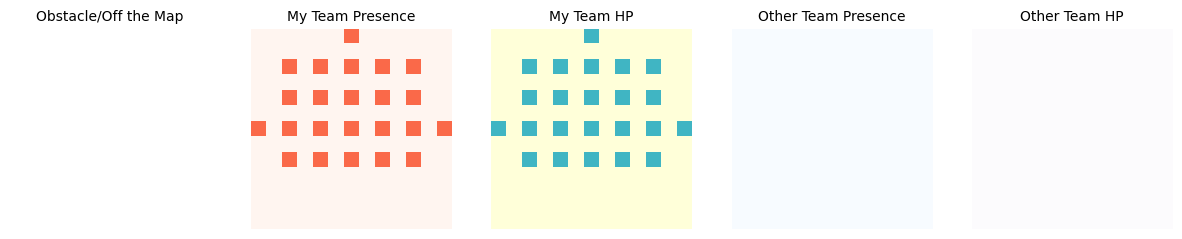

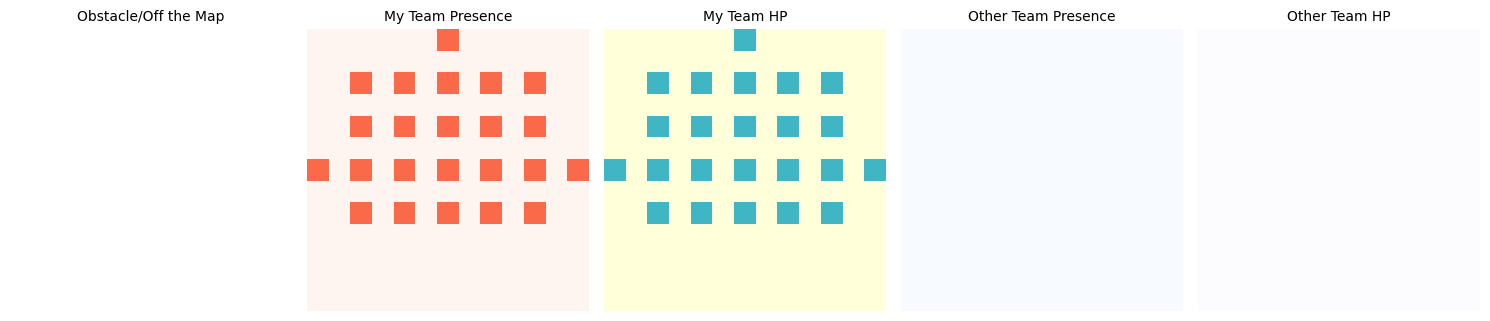

agent: red_44
agent: blue_44


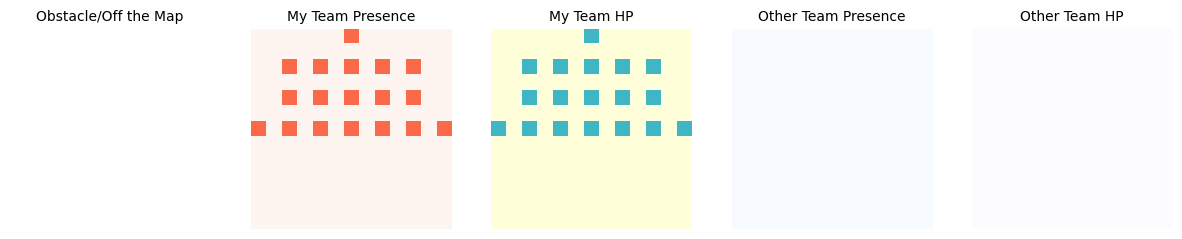

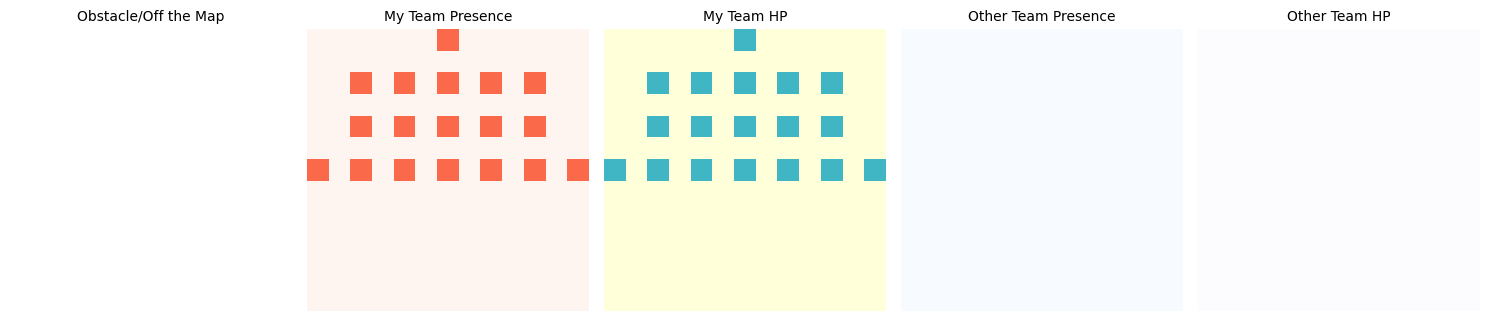

agent: red_45
agent: blue_45


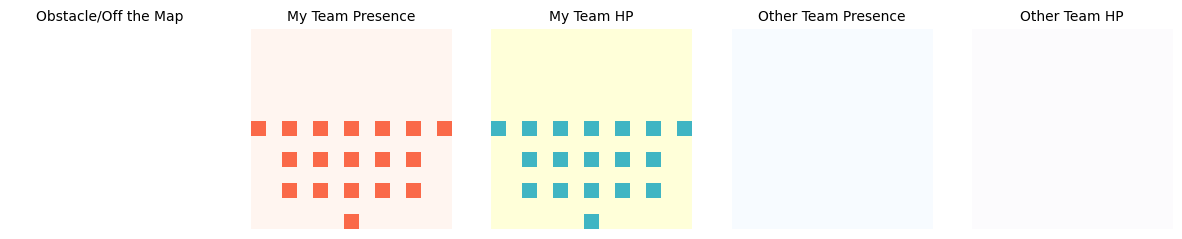

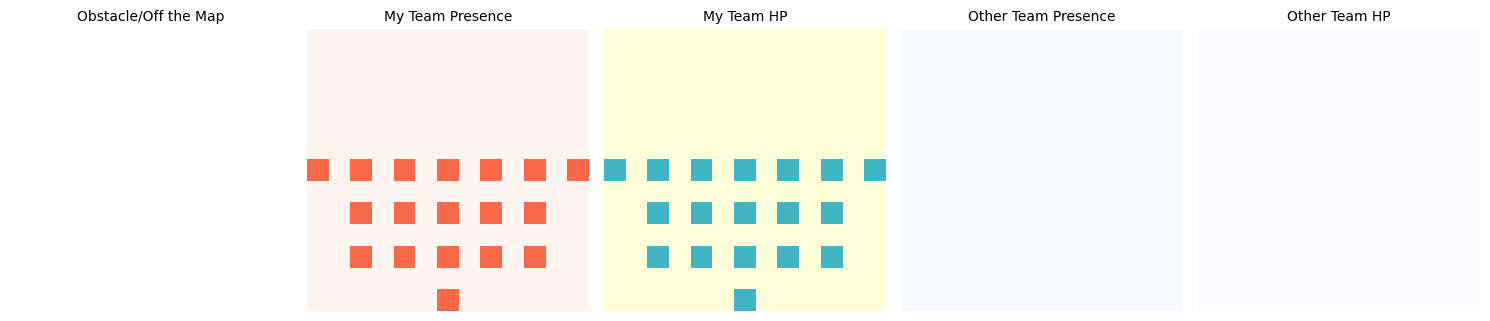

agent: red_46
agent: blue_46


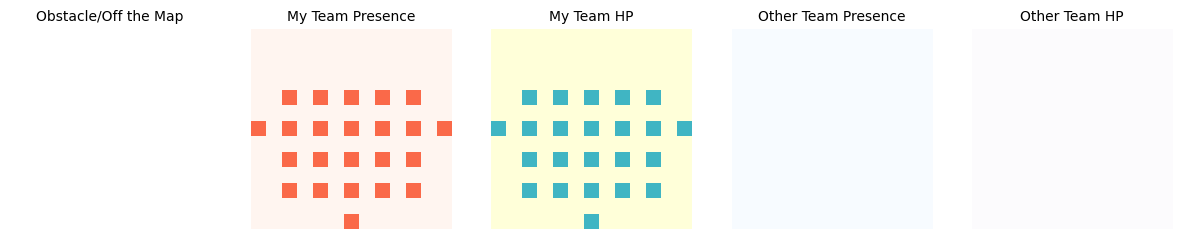

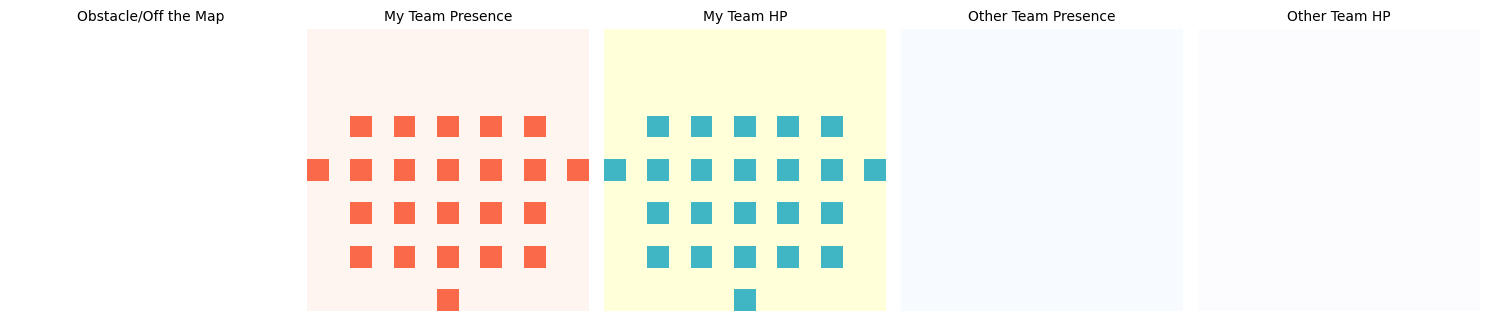

agent: red_47
agent: blue_47


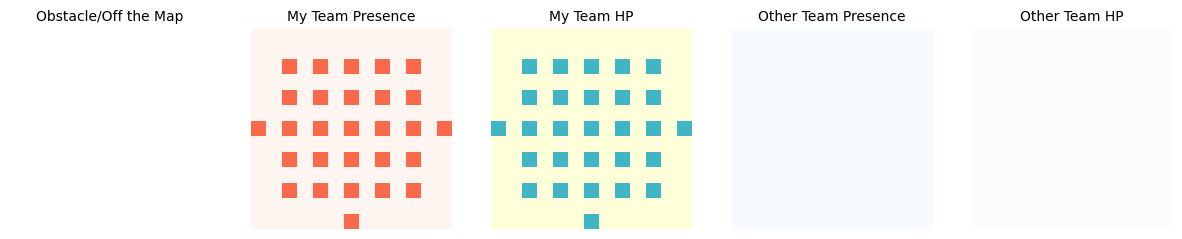

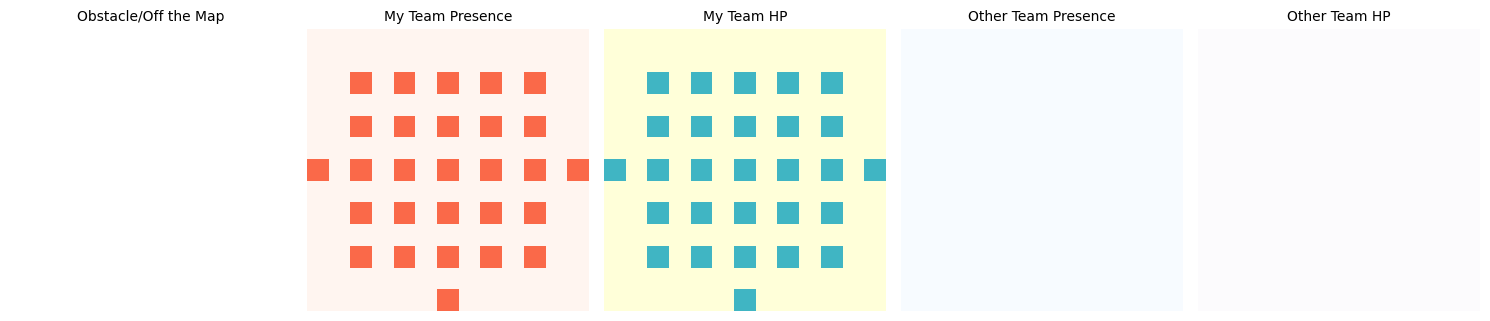

agent: red_48
agent: blue_48


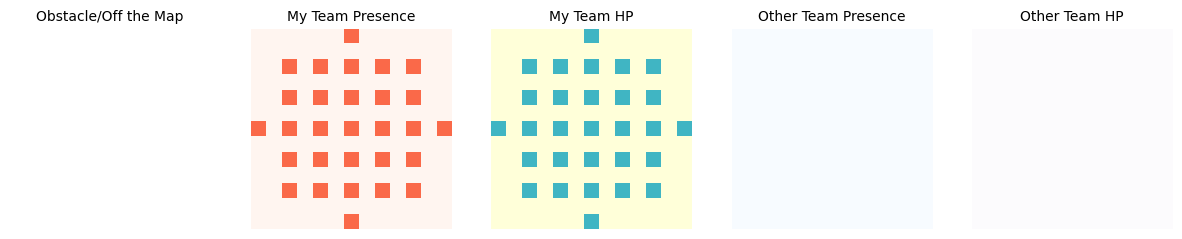

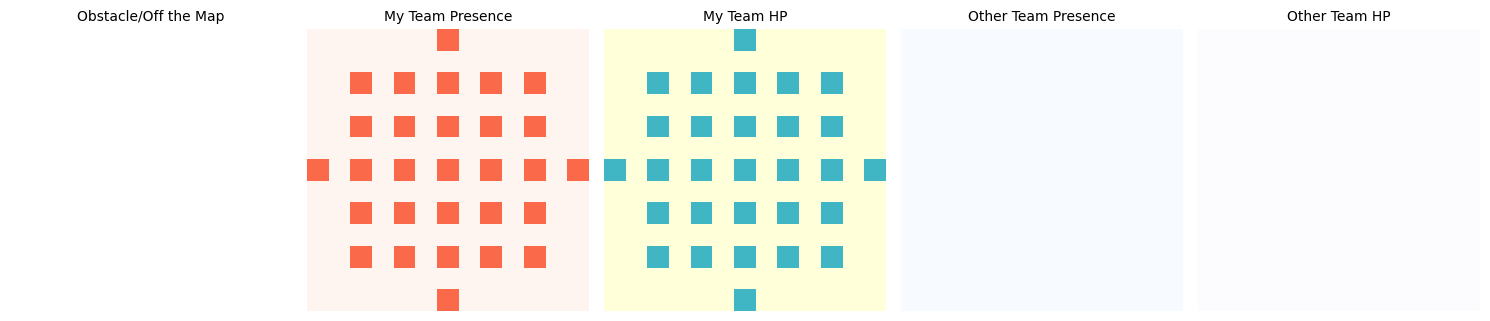

agent: red_49
agent: blue_49


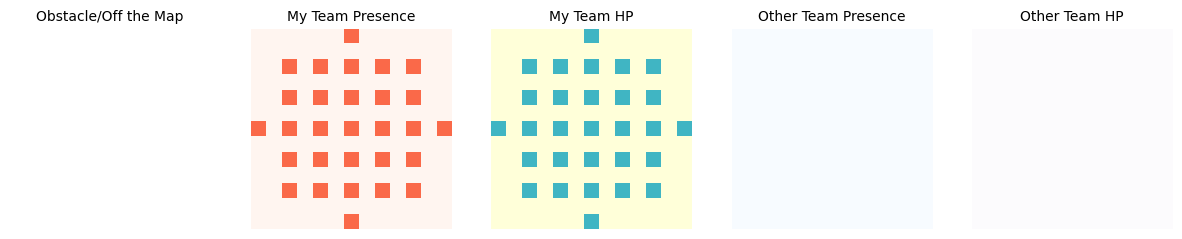

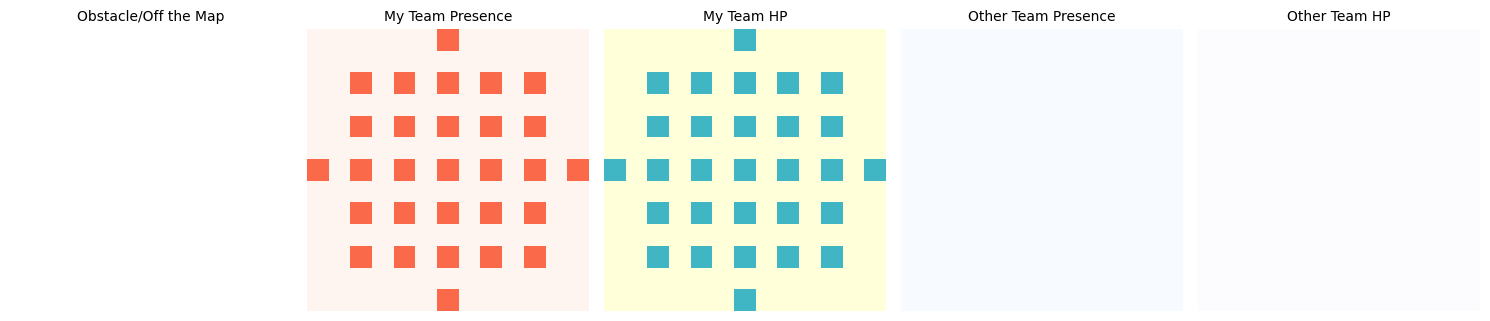

agent: red_50
agent: blue_50


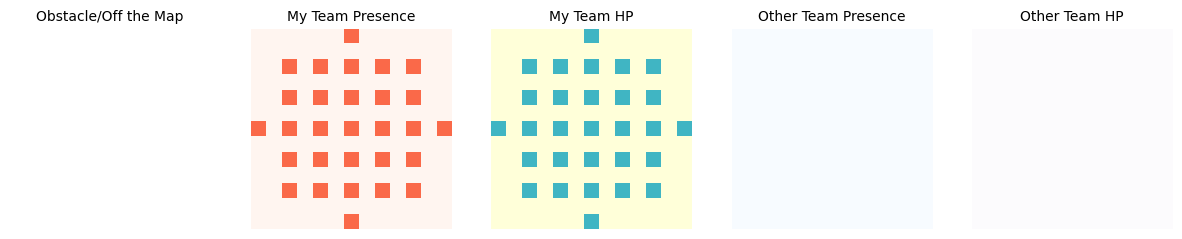

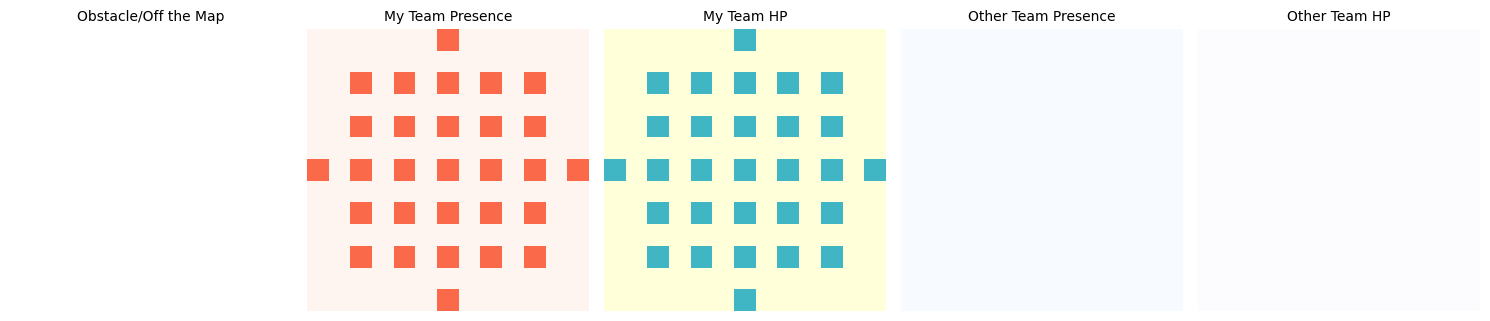

agent: red_51
agent: blue_51


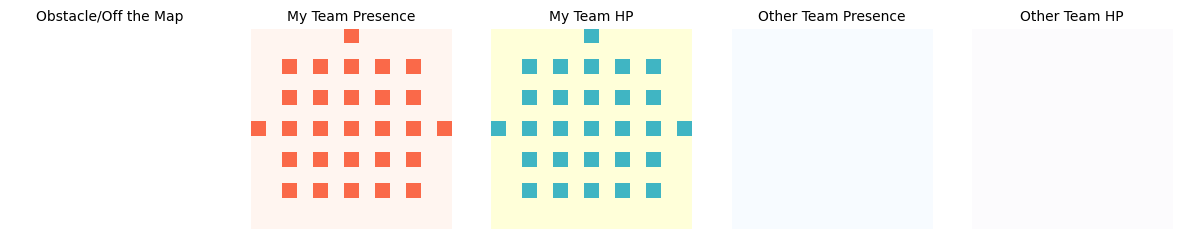

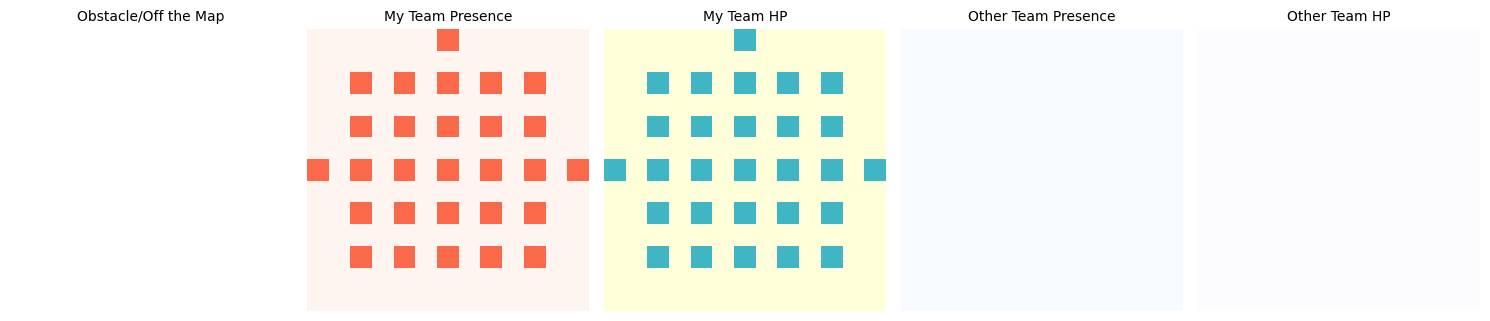

agent: red_52
agent: blue_52


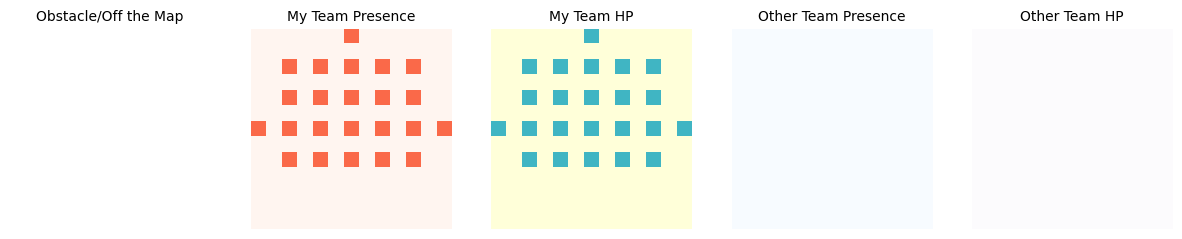

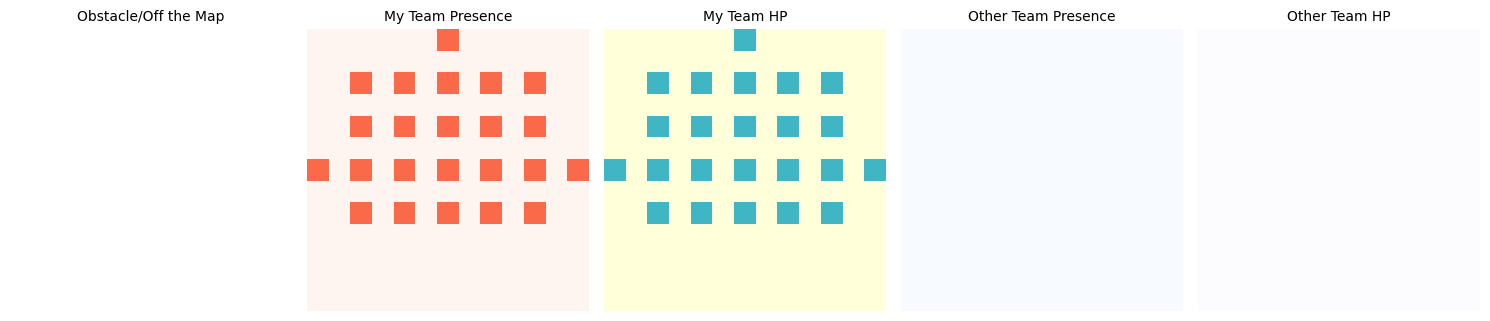

agent: red_53
agent: blue_53


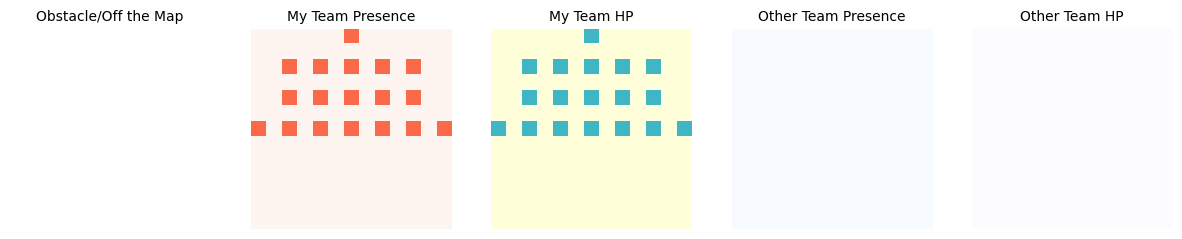

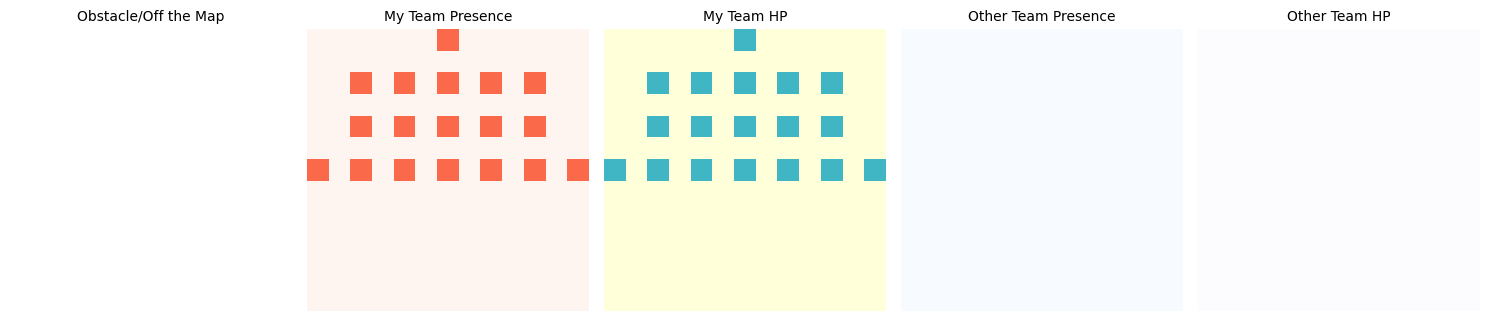

agent: red_54
agent: blue_54


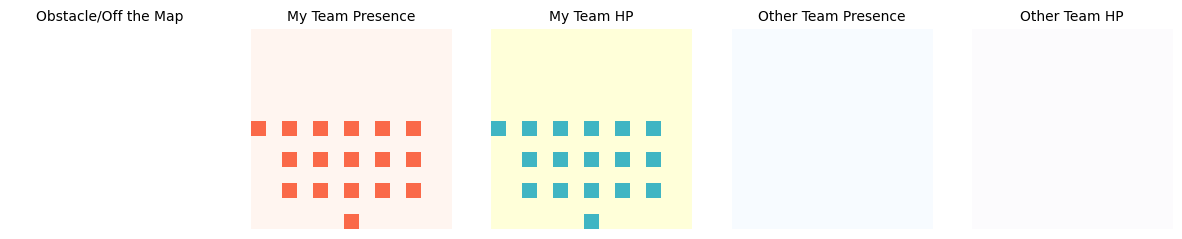

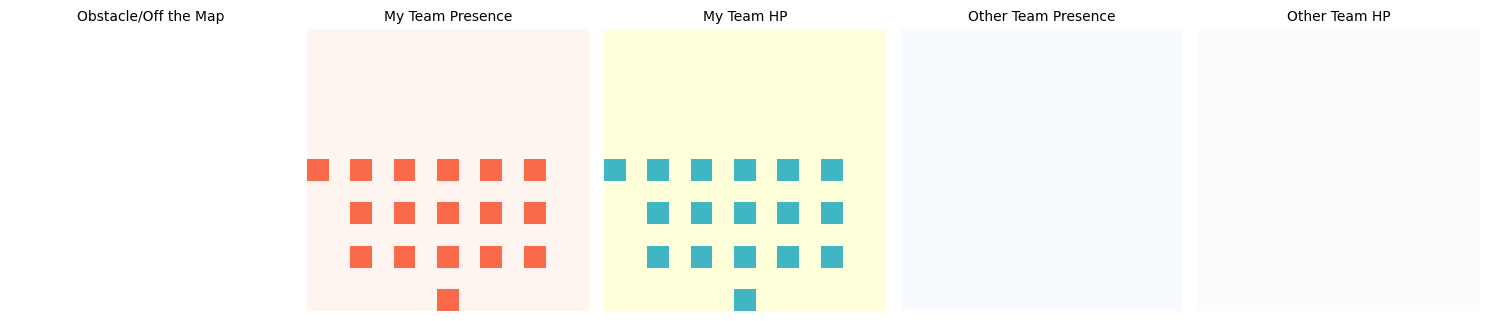

agent: red_55
agent: blue_55


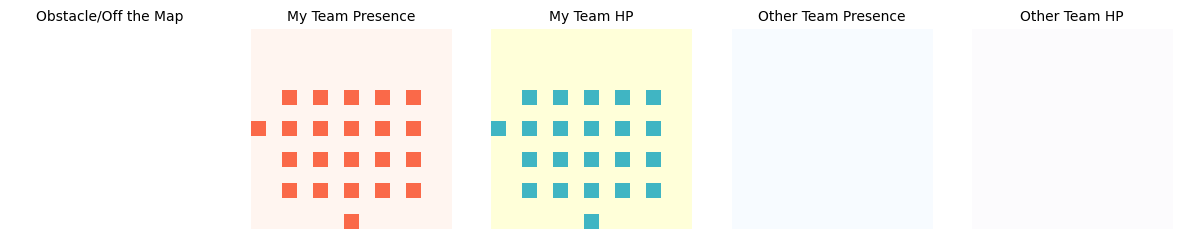

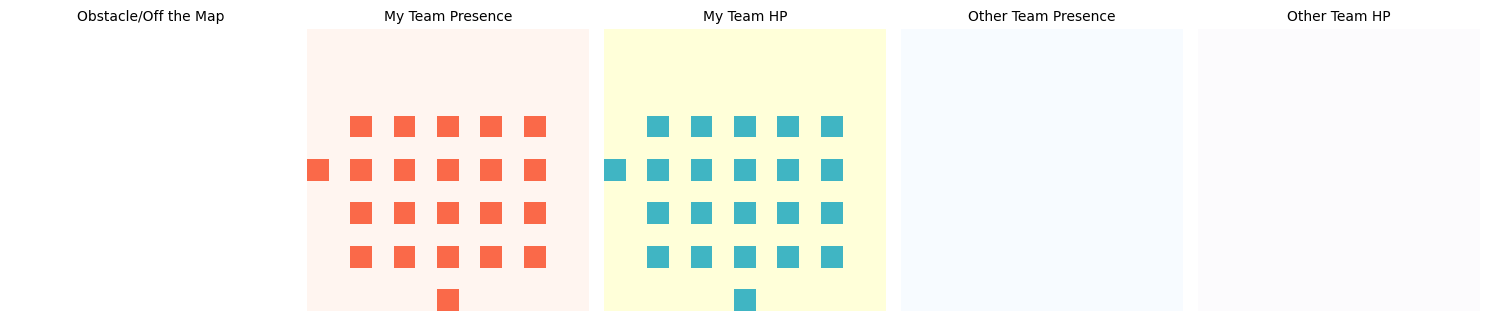

agent: red_56
agent: blue_56


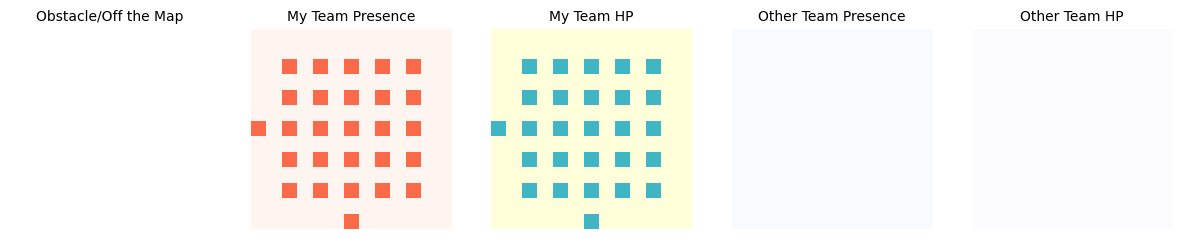

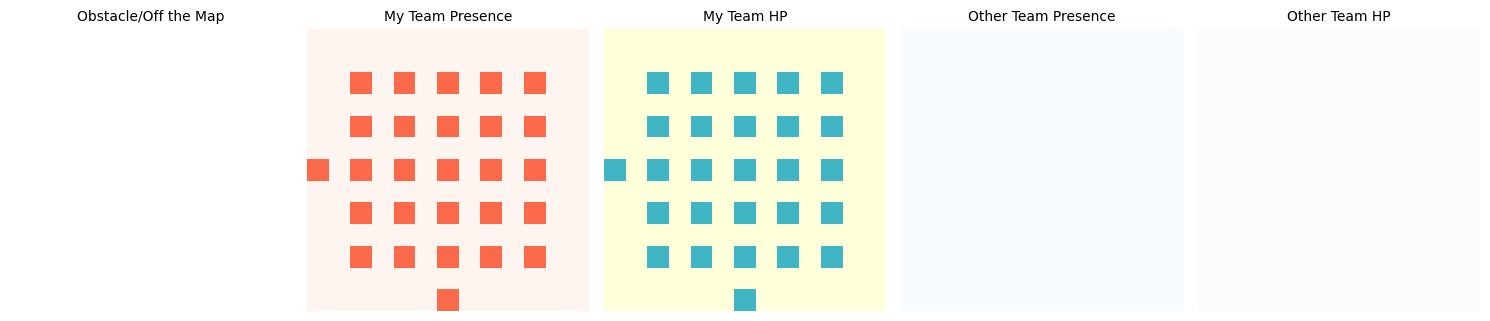

agent: red_57
agent: blue_57


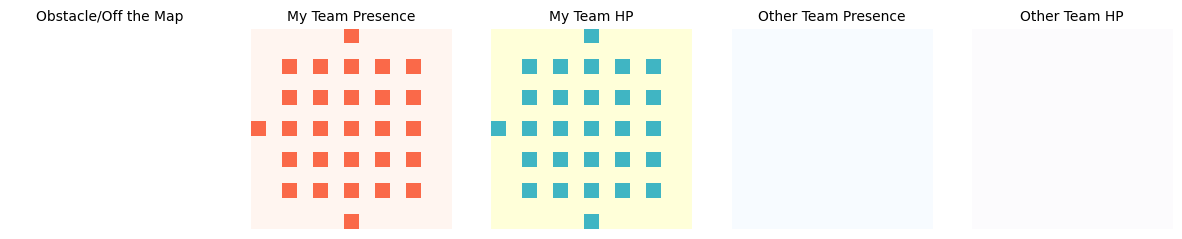

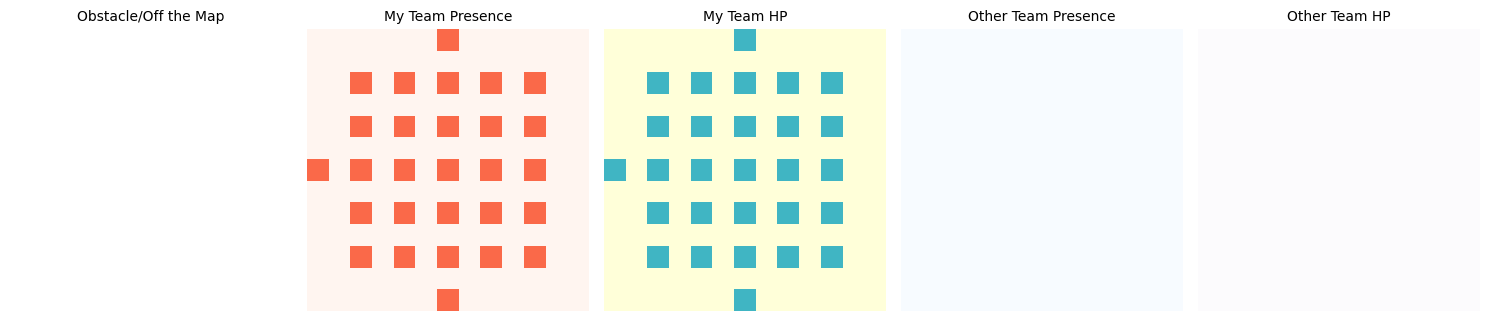

agent: red_58
agent: blue_58


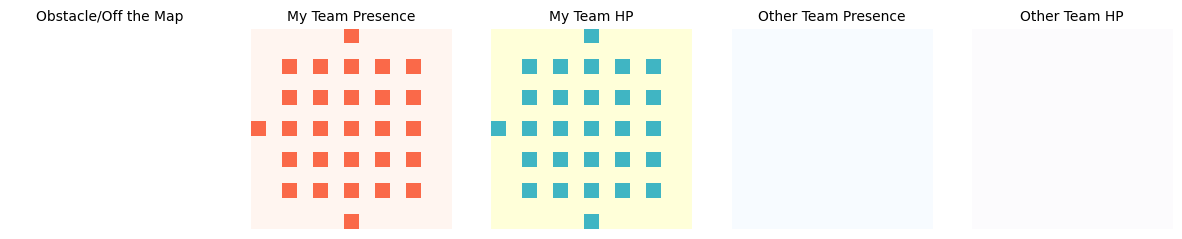

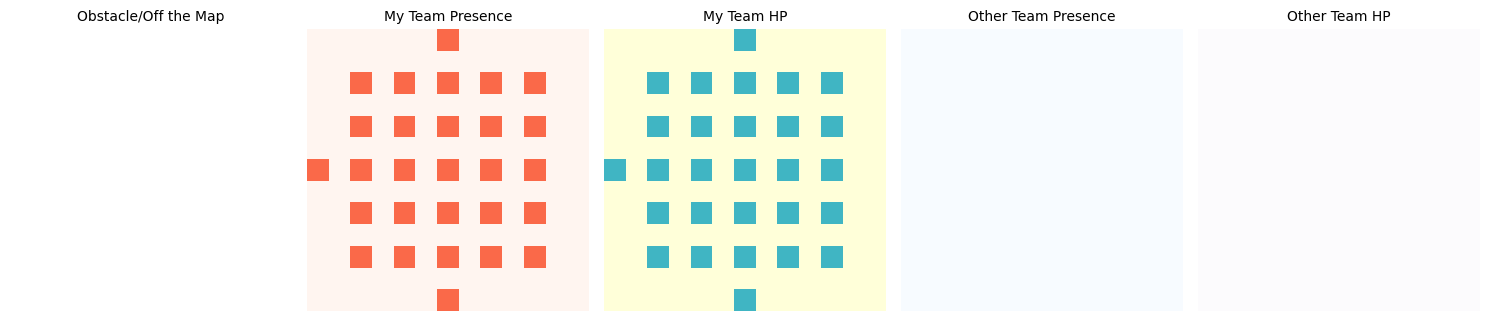

agent: red_59
agent: blue_59


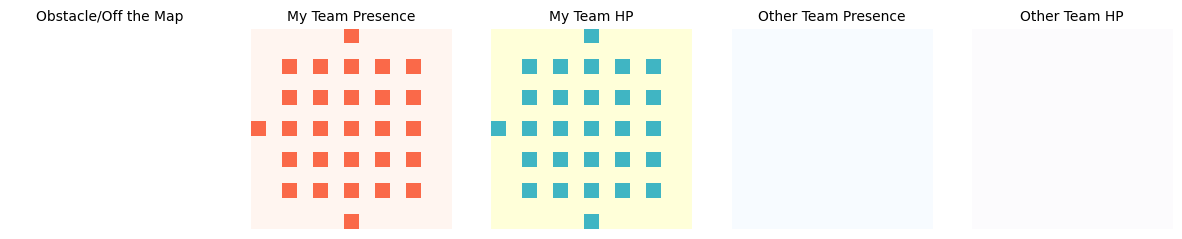

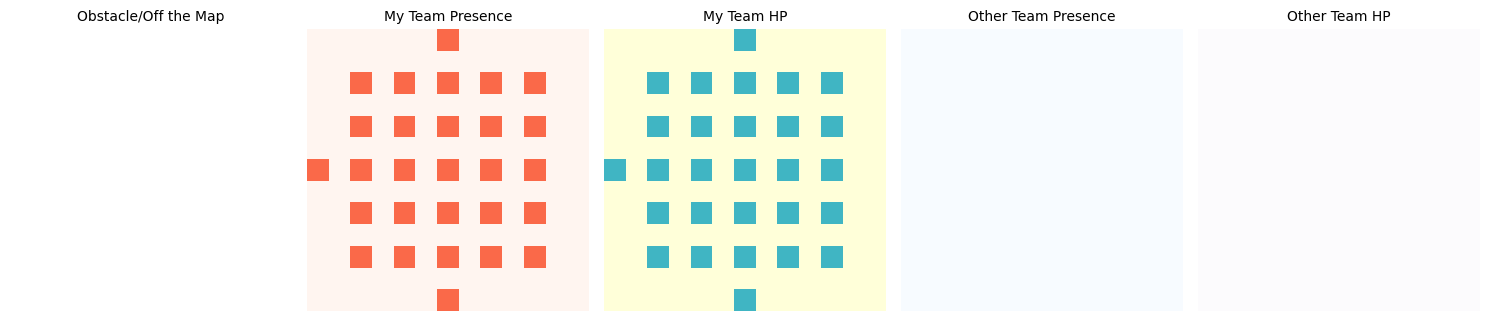

agent: red_60
agent: blue_60


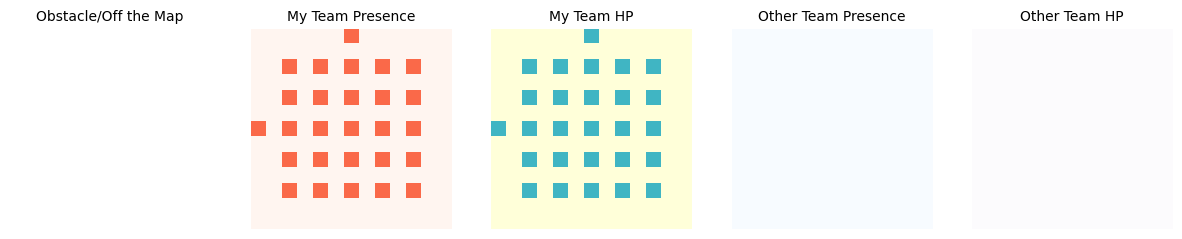

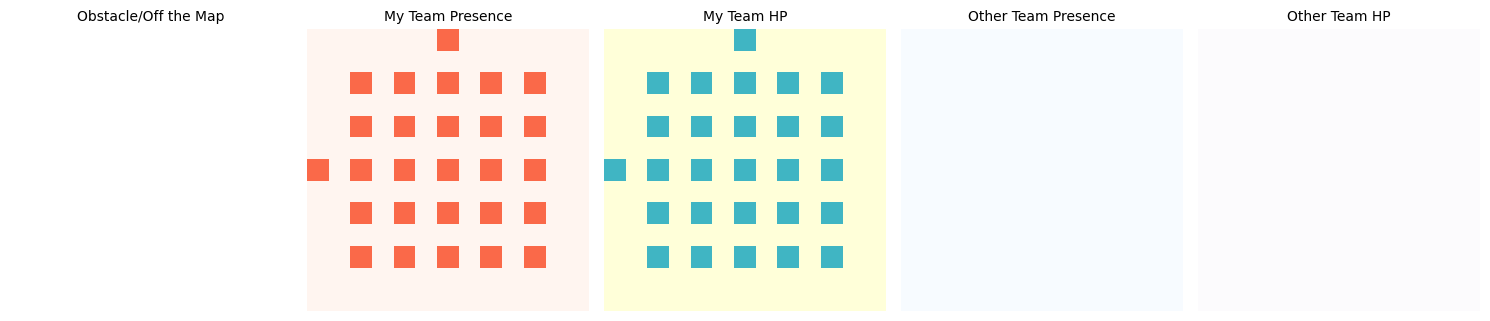

agent: red_61
agent: blue_61


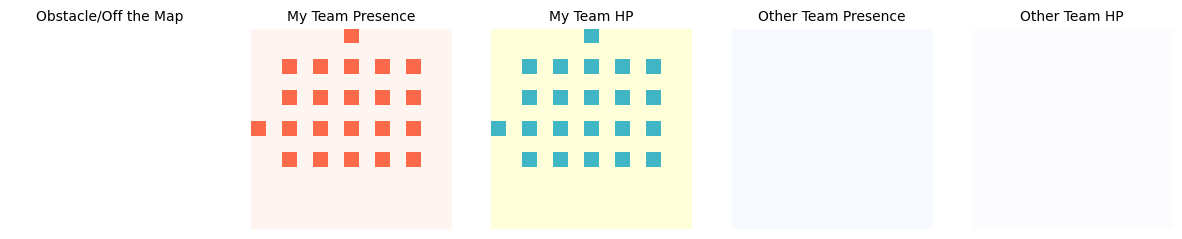

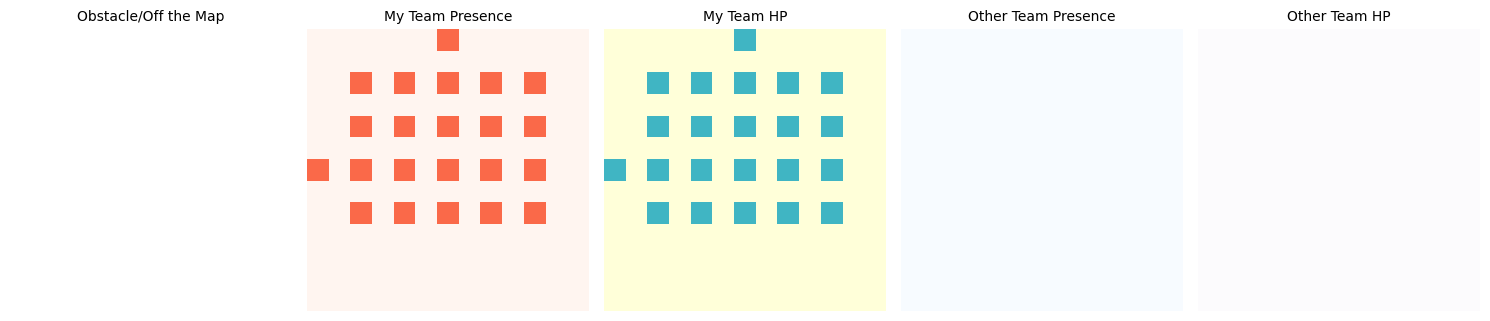

agent: red_62
agent: blue_62


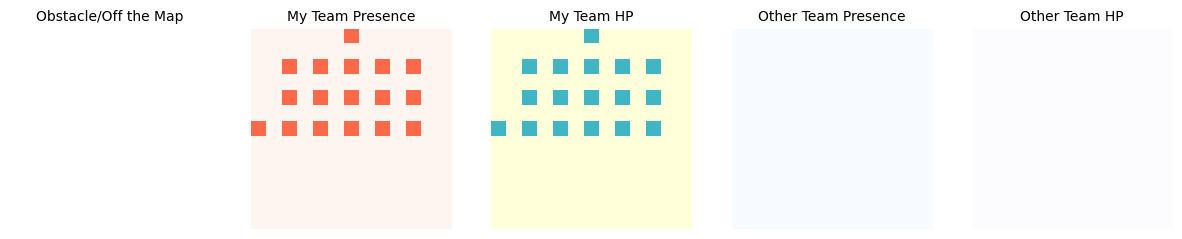

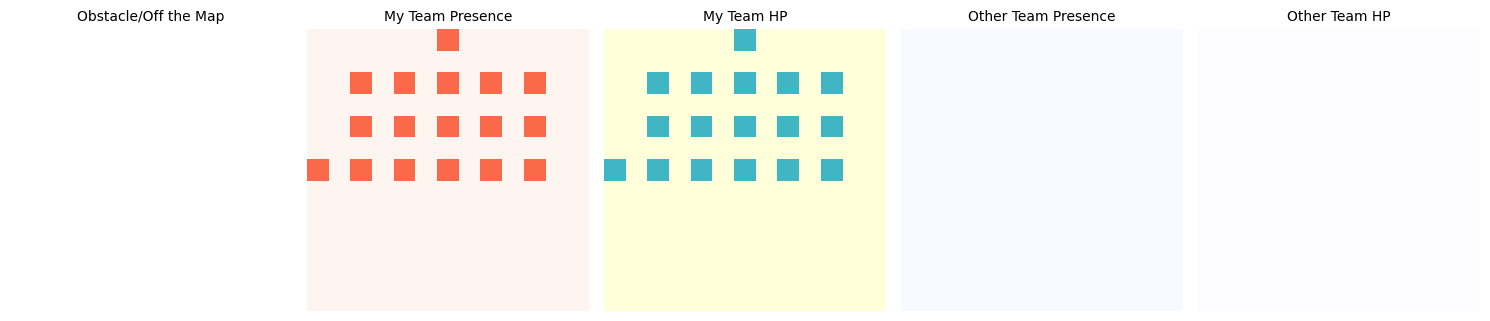

agent: red_63
agent: blue_63


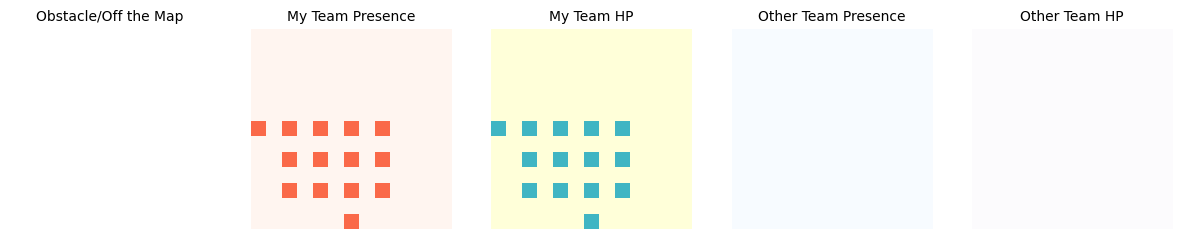

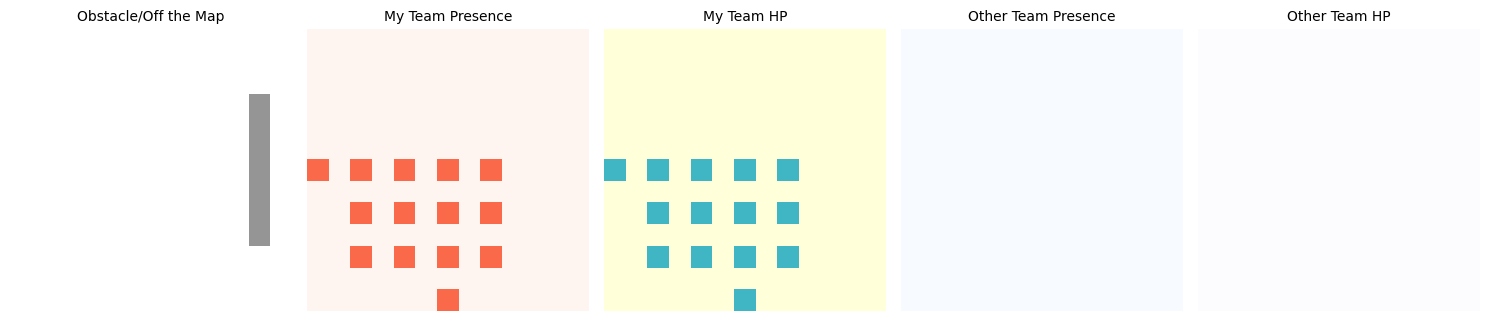

agent: red_64
agent: blue_64


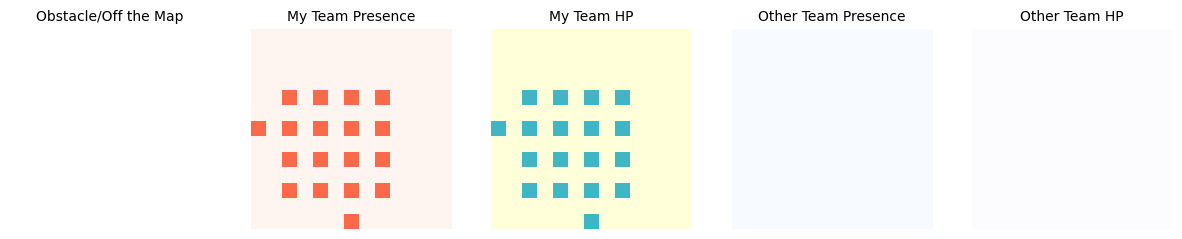

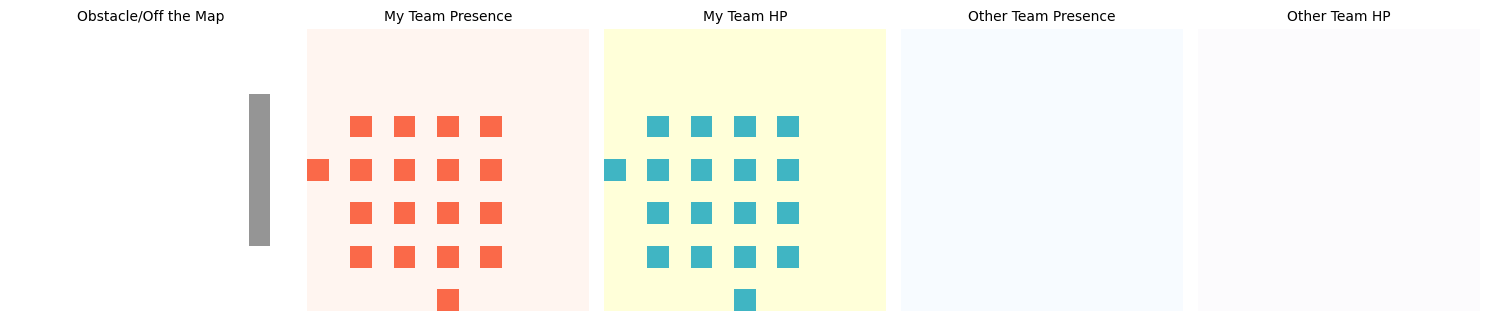

agent: red_65
agent: blue_65


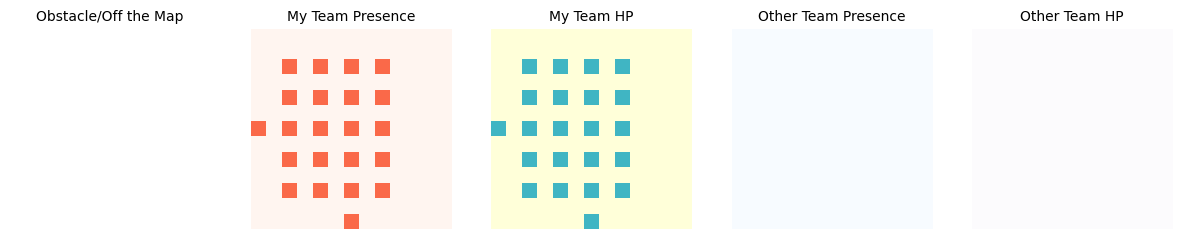

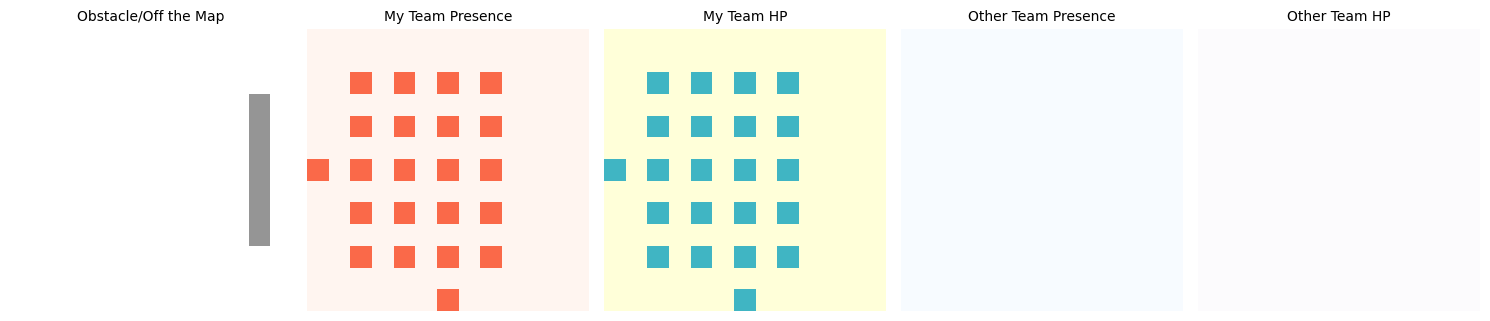

agent: red_66
agent: blue_66


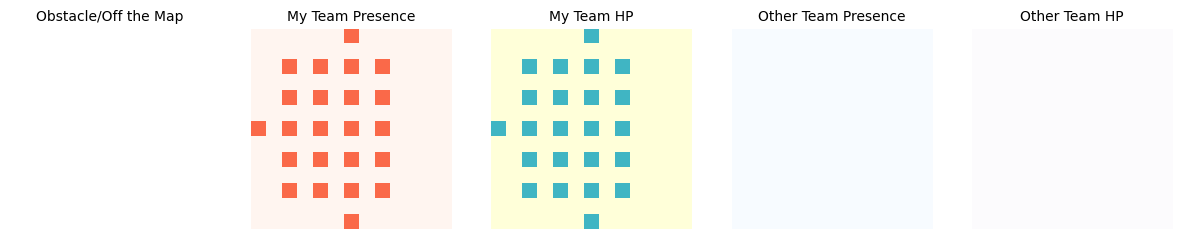

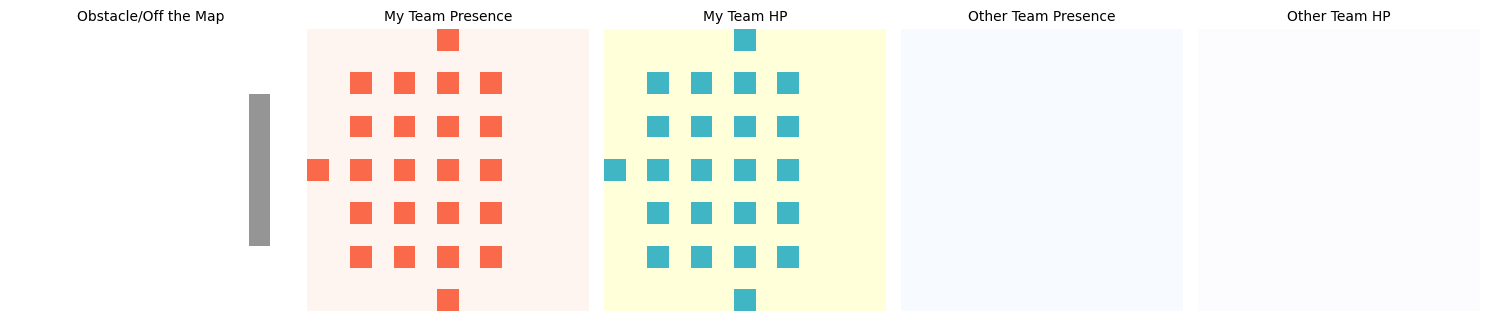

agent: red_67
agent: blue_67


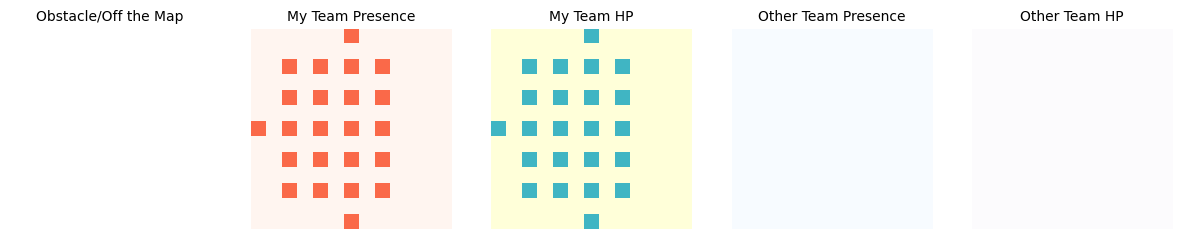

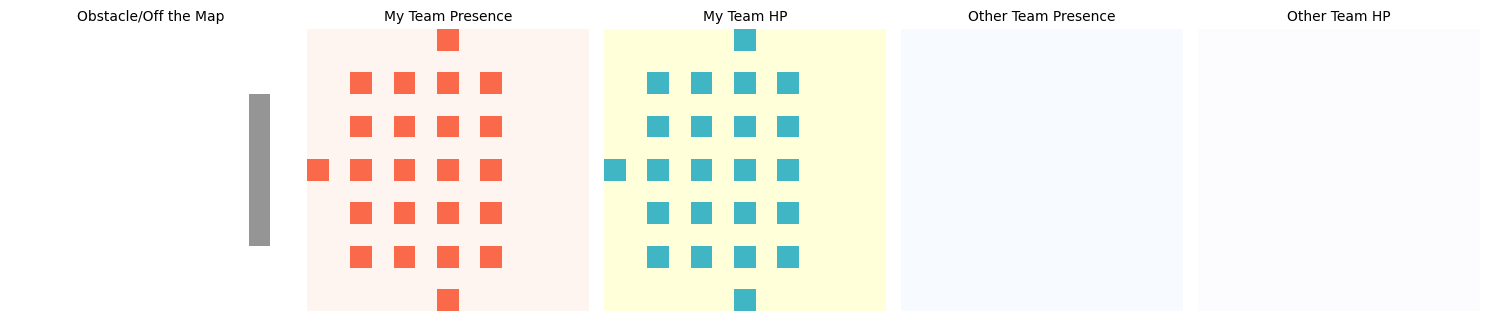

agent: red_68
agent: blue_68


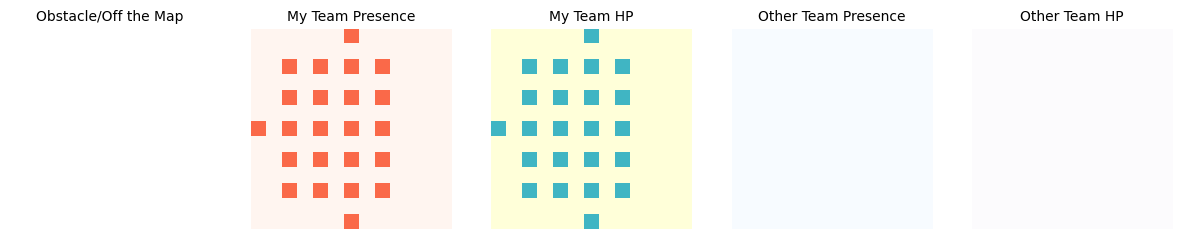

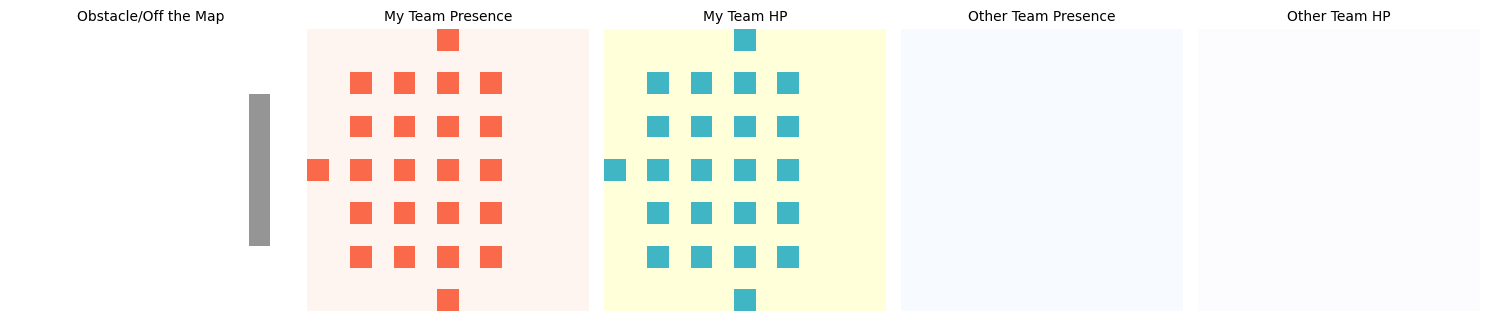

agent: red_69
agent: blue_69


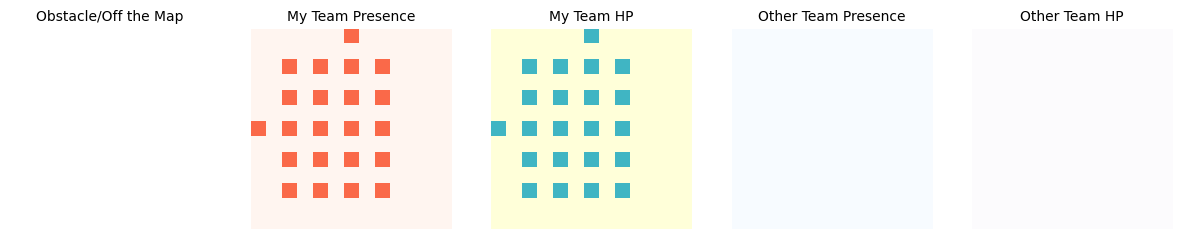

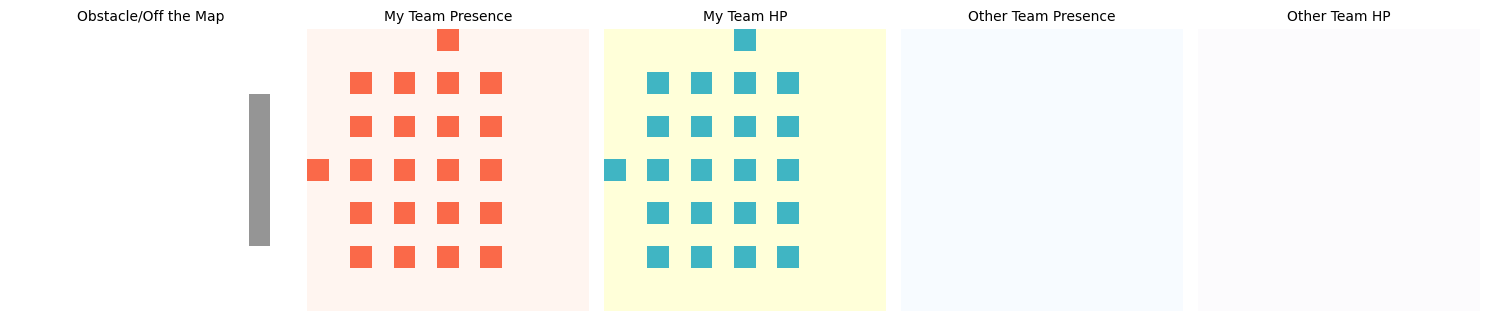

agent: red_70
agent: blue_70


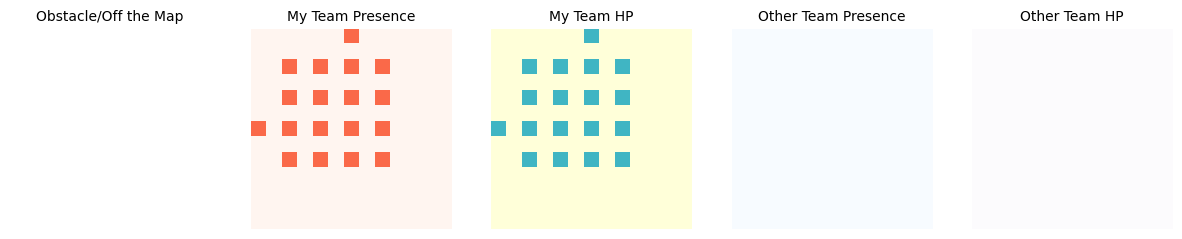

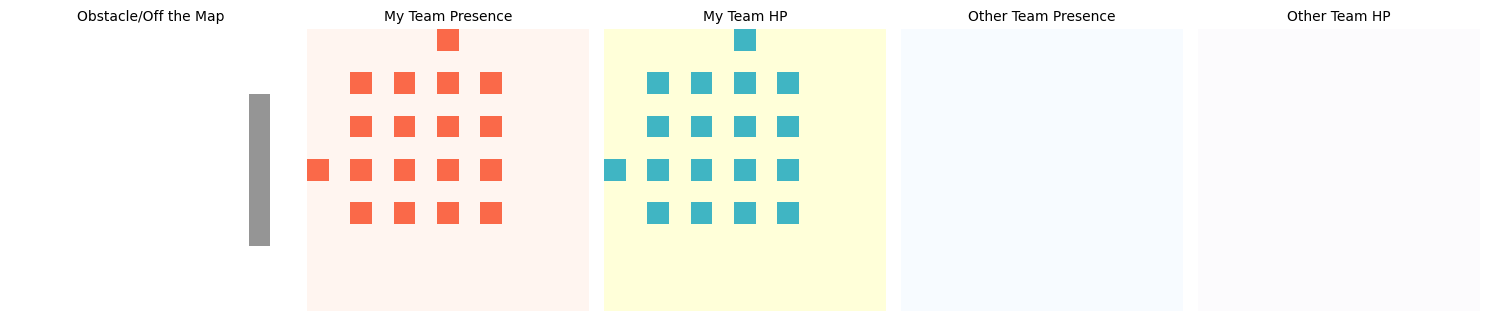

agent: red_71
agent: blue_71


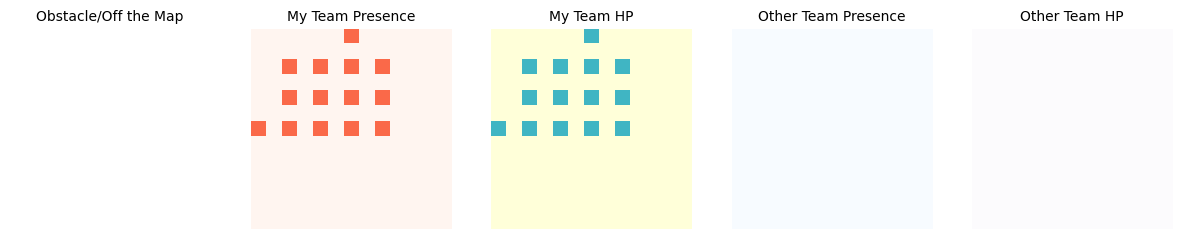

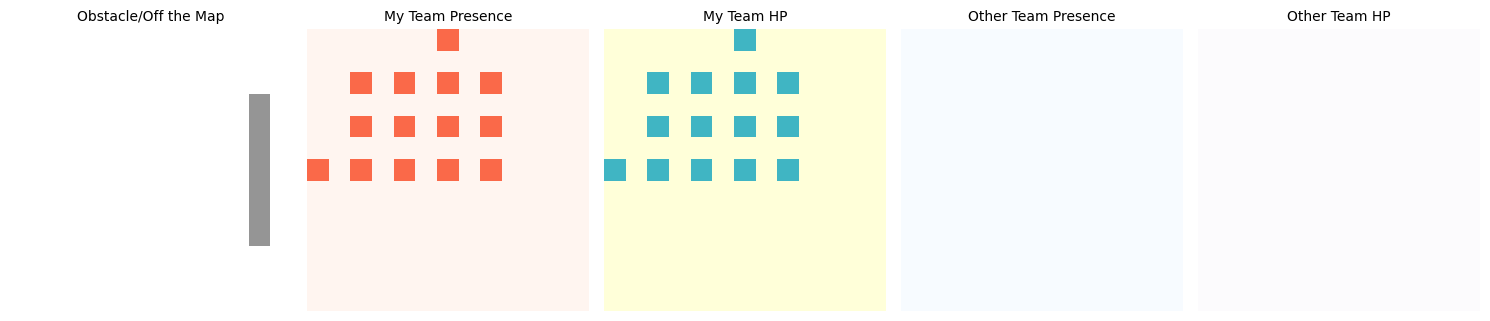

agent: red_72
agent: blue_72


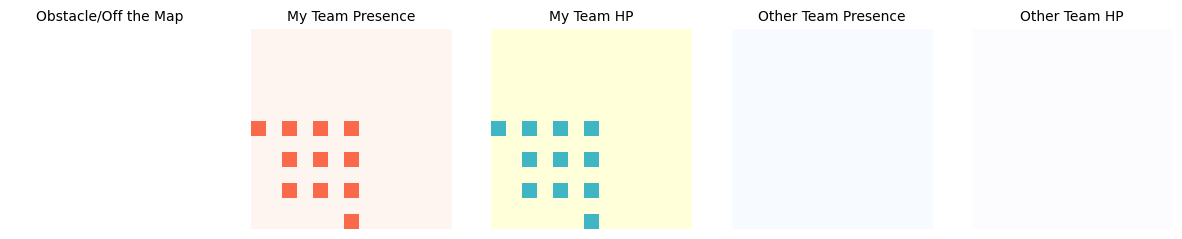

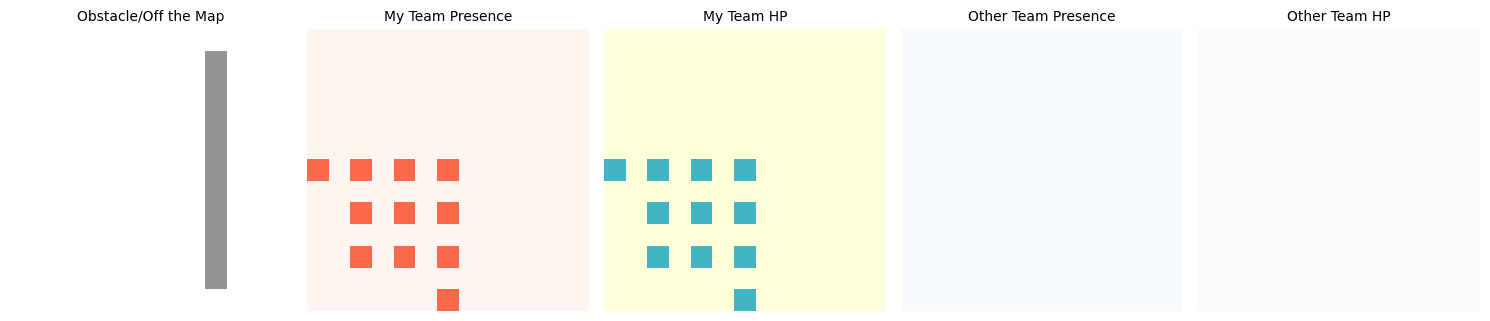

agent: red_73
agent: blue_73


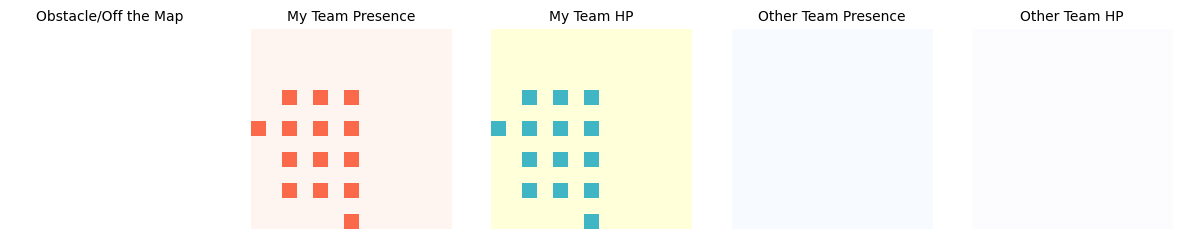

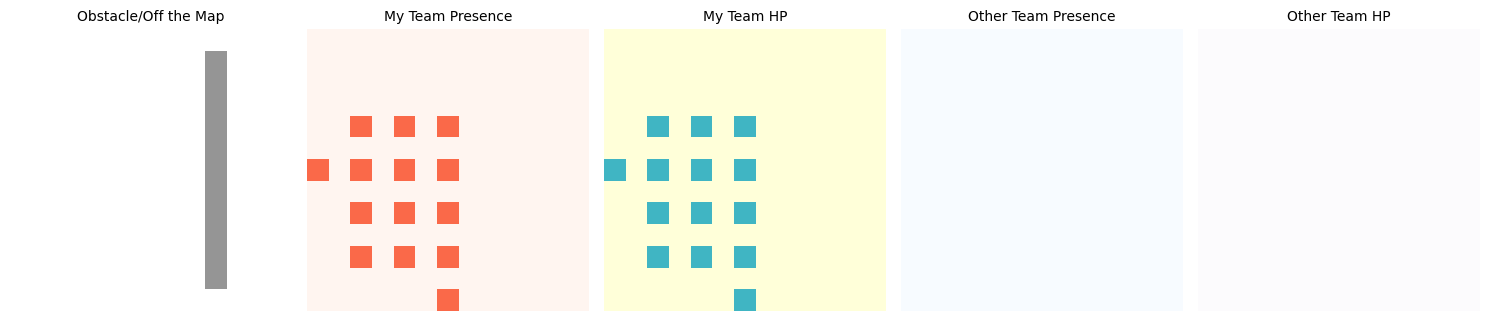

agent: red_74
agent: blue_74


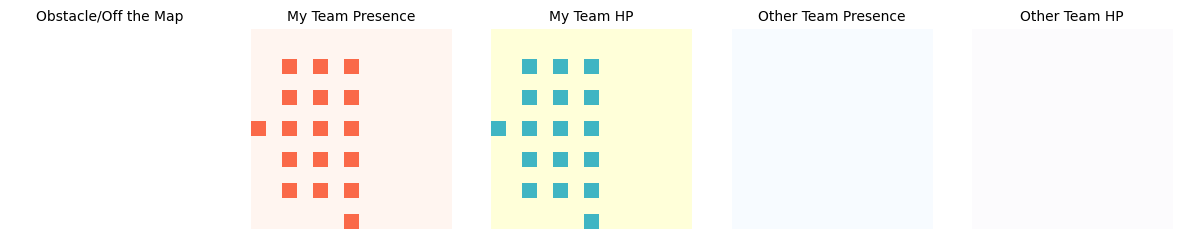

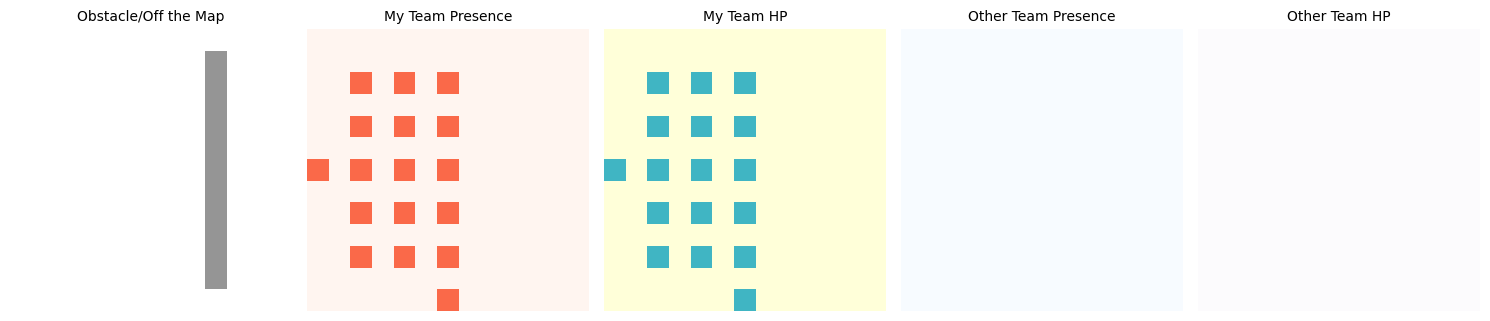

agent: red_75
agent: blue_75


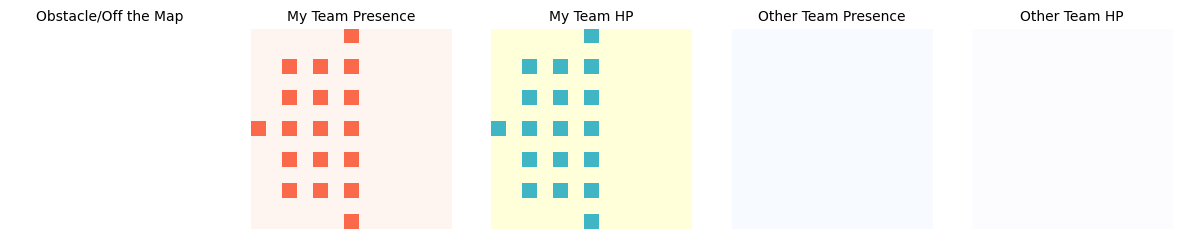

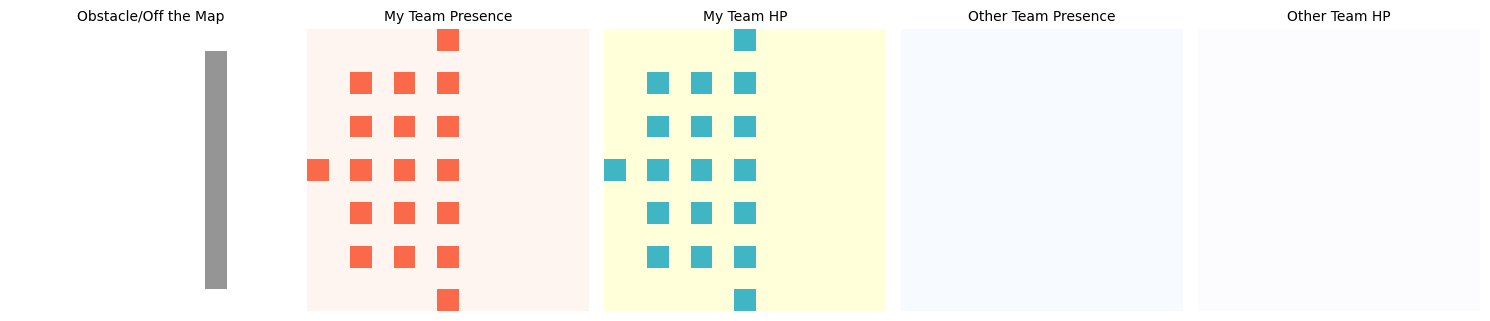

agent: red_76
agent: blue_76


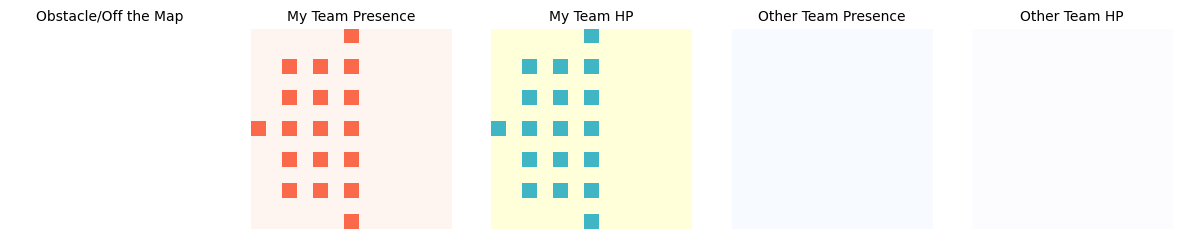

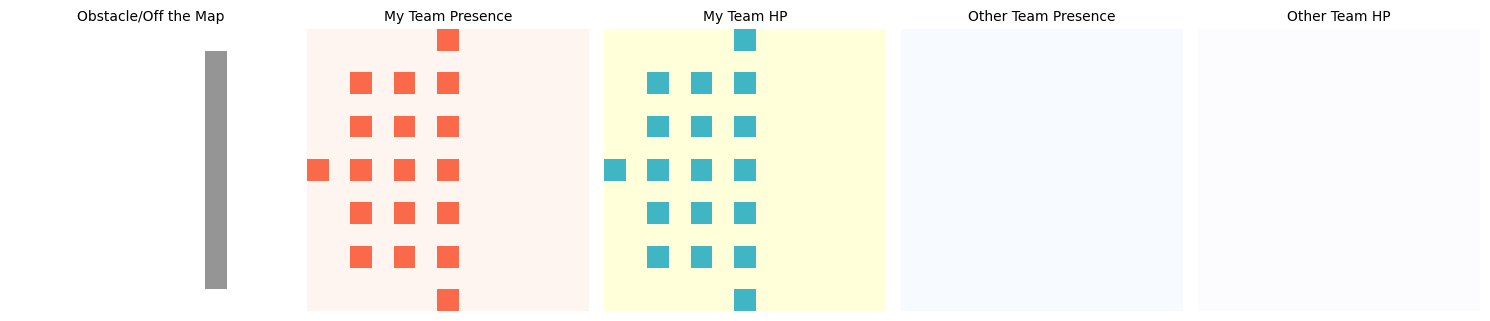

agent: red_77
agent: blue_77


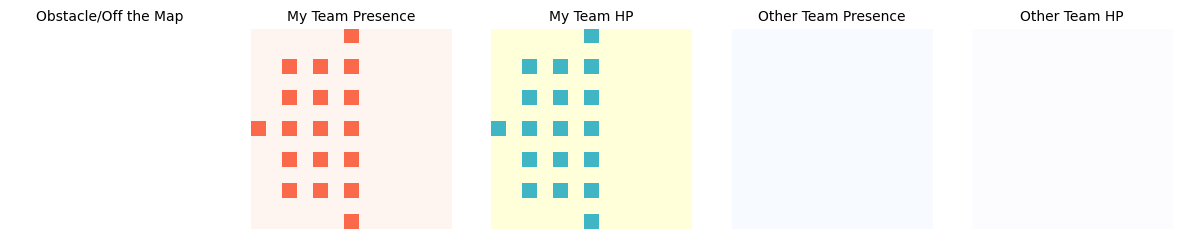

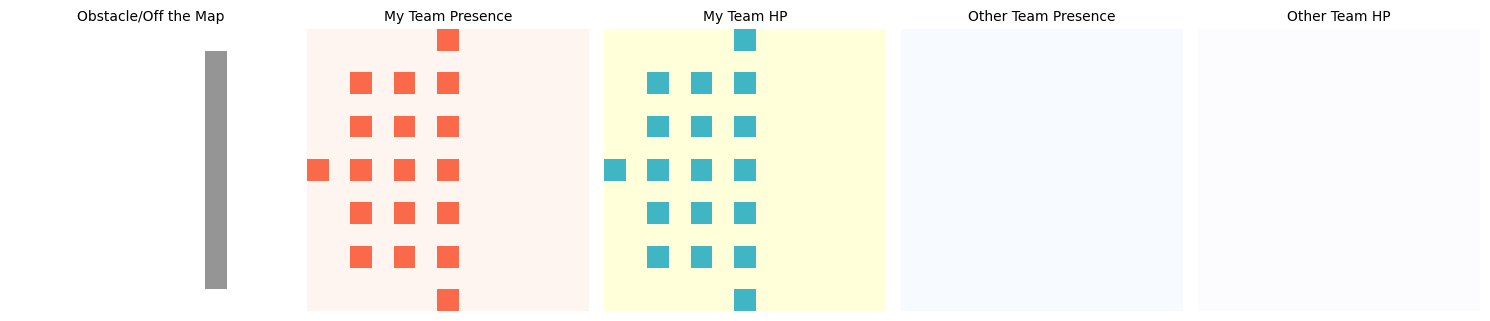

agent: red_78
agent: blue_78


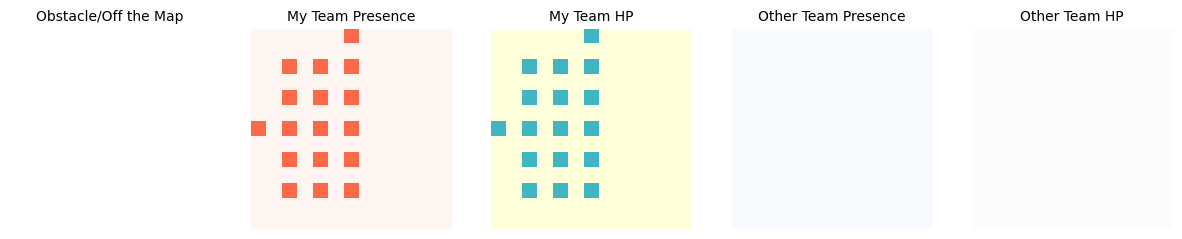

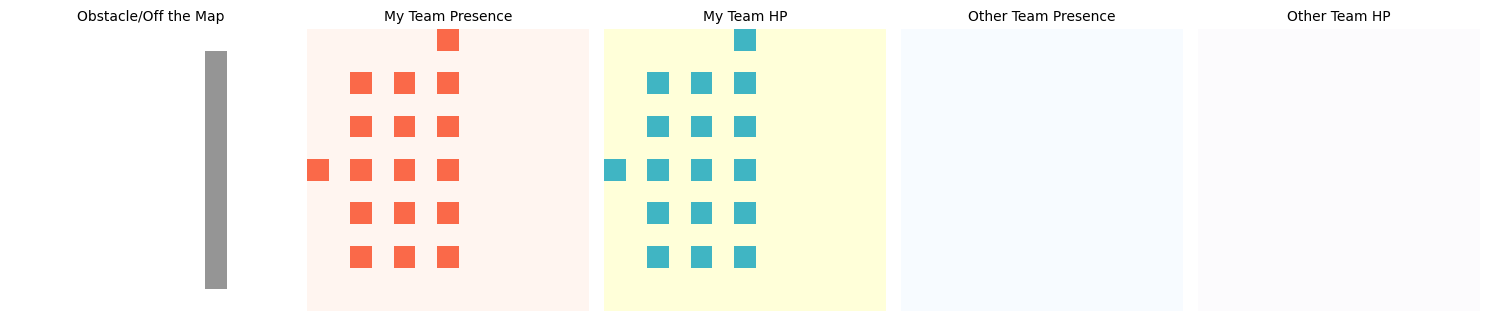

agent: red_79
agent: blue_79


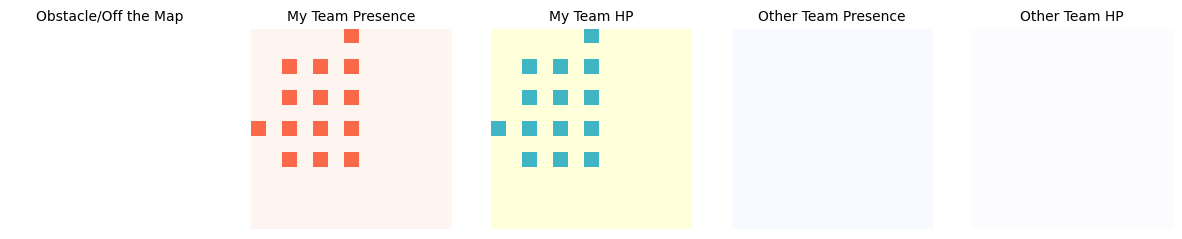

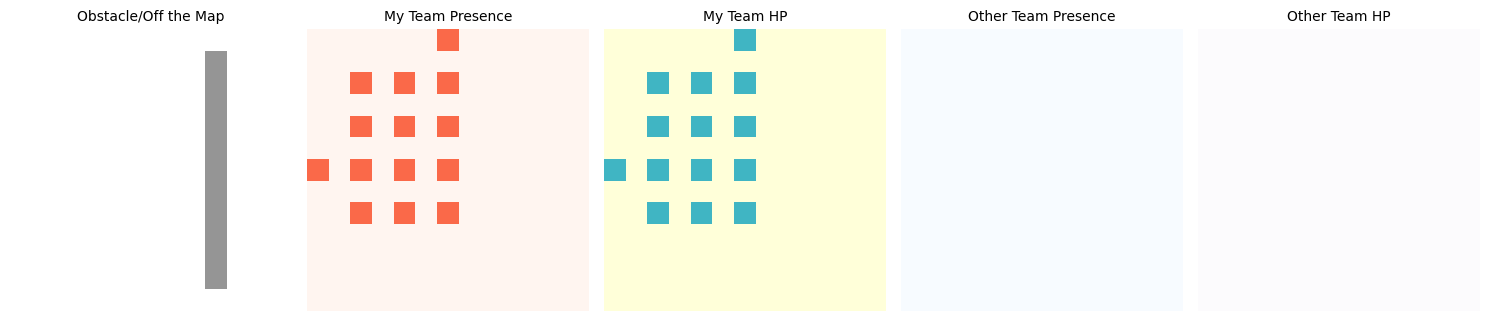

agent: red_80
agent: blue_80


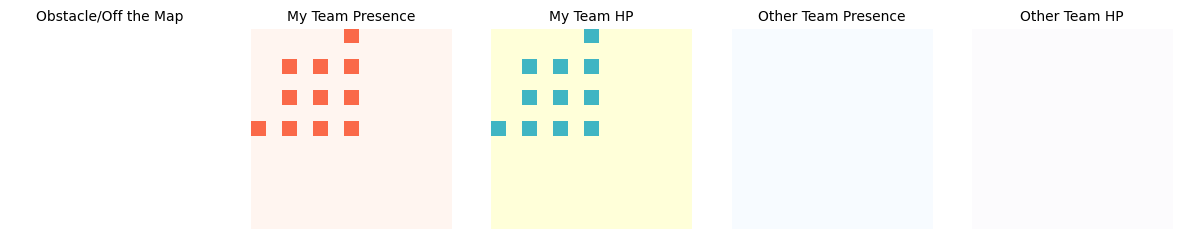

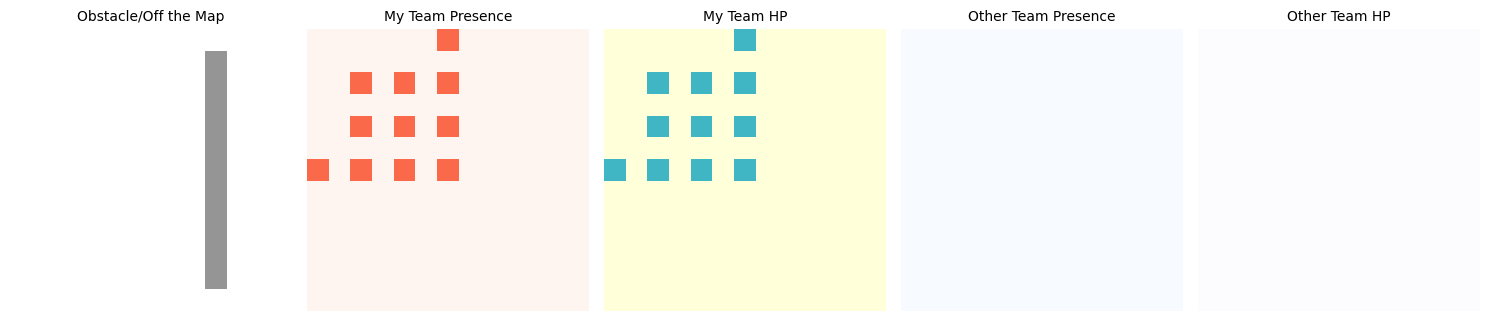

In [9]:
for id in range(81):
    print(f"agent: red_{id}")
    # Plot with updated channel names
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))

    for i, channel in enumerate(channel_names):
        ax = axes[i]
        ax.imshow(env.observe(f"red_{id}")[:, :, i], cmap=channel_to_cmap[channel], vmin=0, vmax=2)
        ax.set_title(channel_names[i], fontsize=10)
        ax.axis("off")
        
    print(f"agent: blue_{id}")
    # Plot with updated channel names
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))

    for i, channel in enumerate(channel_names):
        ax = axes[i]
        ax.imshow(env.observe(f"blue_{id}")[:, :, i], cmap=channel_to_cmap[channel], vmin=0, vmax=2)
        ax.set_title(channel_names[i], fontsize=10)
        ax.axis("off")

    plt.tight_layout()
    plt.show()


In [14]:
from magent2.environments import battle_v4
env = battle_v4.env(map_size=45, minimap_mode=False, max_cycles=200, render_mode="rgb_mode")
env = env
env.reset()
import time
import numpy as np
for i in range(200):
    random_actions = np.random.randint(0, 21)
    # print(random_actions)
    env.step(random_actions)
    print(f"{i}: {env.last()}")
# env.render()
# time.sleep(5)
# env.close()

0: (array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
  